# Приветствие
Доброго времени суток!
Меня зовут Голубев Артём Алексеевич.
Ниже представлена работа по домашнему заданию 4.
Приятного времяпровождения! :)


# Задание

## ВАМ НЕОБХОДИМО:
*	Ознакомиться с содержанием демонстрационных блокнотов. 
*	Создать новый блокнот, импортировать необходимые библиотеки (необязательно копировать все — только нужные функции и /или классы).
*	Выполнить следующие задания (каждое задание под отдельным заголовком #).
 
### МЕТОД ГЛАВНЫХ КОМПОНЕНТ
#### 1.  Для синтетических данных
*	Сгенерируйте данные в виде эллипса с разными значениями радиусов и углов наклона, отличные от тех, что в примере (достаточно 1 раза).
*	Примените метод главных компонент.
*	Визуализируйте пространство главных компонент.
*	Оцените собственные значения, собственные вектора, а также распределение минимальных и максимальных значений в пространстве главных компонент.
 
#### 2.   Для набора данных MNIST
*	Загрузите данные MNIST. Поэкспериментируйте с количеством компонент при применении метода главных компонент.
*	Оцените качество восстановления при разных значениях размерности собственного пространства (проверьте хотя бы 2 различных варианта).
*	В пространстве главных компонент для данных MNIST определите, каким цифрам соответствуют точки со следующими координатами:
*	PCA-1 -7; PCA-2 0; 
*	PCA-1 4; PCA-4 1;
*	 PCA-3 0; PCA-4 5;
*	PCA-3 -4; PCA-2 -3.
 
#### 3.   Для набора данных Cars Moldova
*	Примените метод главных компонент для набора данных Cars (сразу очищенный от дубликатов и выбросов, лучше с добавленными признаками из «Задания 1»).
*	Выполните визуализацию пространства главных компонент и их связь с исходными признаками.
*	Примените пространство главных компонент в качестве входных данных для алгоритмов регрессии или классификации (на ваш выбор). Сравните результаты.
 
### КЛАСТЕРИЗАЦИЯ К-СРЕДНИХ
#### 1.  Для синтетических данных
*	Сгенерируйте данные, распределенные как знак Инь и Ян или концентрические круги, и проверьте, как работает алгоритм кластеризации К-Средних на этих данных.
*	Сделайте преобразование исходных данных, чтобы улучшить результаты кластеризации.
*	Оцените оптимальное число кластеров по методу Локтя для всех ситуаций.
 
#### 2.   Для набора данных MNIST
*	Загрузите данные MNIST. Используйте результаты Метода главных компонент в качестве входных данных (возьмите первые 4 главные компоненты).
*	Примените кластеризацию К-Средних на этих данных.
*	Визуализируйте результат.
*	Оцените связь кластеров с цифрами на изображениях при использовании К = 10 (вам поможет pd.crosstab).
 
#### 3.   Для набора данных Cars Moldova
*	Загрузите набор данных Cars (сразу очищенный от дубликатов и выбросов, лучше с добавленными признаками из «Задания 1»).
*	Выполните кластеризацию для числовых признаков после предварительной обработки. Используйте все числовые признаки, выполнив визуализацию в разных двумерных проекциях (как в примере для набора данных MNIST).
*	Оцените связь кластеров с категориальными признаками (вам поможет pd.crosstab).



# Импорты

## Библиотеки

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap

import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
plt.style.use('dark_background')

## Функции

In [3]:
def create_elipsoid_data(C1 = 0, C2 = 0, # координаты центра
                         S1 = 5, S2 =1, # радиусы эллипса
                         theta =45, # угол наклона
                         N = 250, # число точек
                         random_state = 42): # фиксируем "случайность"
    
    np.random.seed(random_state)
    
    theta = np.pi*theta/180
    Centers = np.array([C1,C2])
    Sigmas = np.array([S1,S2])

    R = np.array([[np.cos(theta), - np.sin(theta)],
                [np.sin(theta), np.cos(theta)]]) 

    return (R @ np.diag(Sigmas) @ np.random.randn(2, N)+np.diag(Centers)@ np.ones((2, N))).T


In [4]:
def plot_multi(data, y,  names):
    axis = [[0,1],
            [2,1],
            [0,3],
            [2,3],]


    labels = [['',names[1]],
            ['',''],
            [names[0],names[3]],
            [names[2],'']]

    fig, sub = plt.subplots(2, 2, figsize = (11,11))

    for n, (axi, label, ax) in enumerate(zip(axis,  labels, sub.flatten())):
        scatter = ax.scatter(data[:,axi[0]],data[:,axi[1]],
                             c=y, s = 36, cmap = 'tab10',
                             alpha = 0.7, facecolors = 'none' );
        ax.set_ylabel(label[1], fontsize = 20)
        ax.set_xlabel(label[0], fontsize = 20)
        ax.tick_params(axis='x', labelsize= 15)
        ax.tick_params(axis='y', labelsize= 15)     
        ax.grid()
        ax.set_xlim([-10,12])
        ax.set_ylim([-8,8])
        legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper right", title="Цифры",
                        fontsize = 15)
        ax.add_artist(legend1)

In [5]:
def plot_multi_1(data, y,  names):
    axis = [[0,1],
            [2,1],
            [0,3],
            [2,3],]


    labels = [['',names[1]],
            ['',''],
            [names[0],names[3]],
            [names[2],'']]

    fig, sub = plt.subplots(2, 2, figsize = (11,11))

    for n, (axi, label, ax) in enumerate(zip(axis,  labels, sub.flatten())):
        scatter = ax.scatter(data[:,axi[0]],data[:,axi[1]],
                             c=y, s = 36, cmap = 'tab10',
                             alpha = 0.7, facecolors = 'none' );
        ax.set_ylabel(label[1], fontsize = 20)
        ax.set_xlabel(label[0], fontsize = 20)
        ax.tick_params(axis='x', labelsize= 15)
        ax.tick_params(axis='y', labelsize= 15)     
        ax.grid()
        # ax.set_xlim([-10,12])
        # ax.set_ylim([-8,8])
        legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper right", title="Цифры",
                        fontsize = 15)
        ax.add_artist(legend1)

In [6]:
def plot_data(ax,ds,name='',marker = 'o',colors =("#FF0000", '#0000FF'),alpha=0.7, s = 150, facecolor=True):
    X, y = ds

    cm_bright = ListedColormap(colors)
    ax.set_title(name, fontsize = 30)
    if facecolor:
        ax.scatter(X[:, 0], X[:, 1],
                   marker = marker, c=y,
                   cmap=cm_bright,s = s,
                   alpha =alpha)
    else:
        ax.scatter(X[:, 0], X[:, 1],
                   marker = marker, c=y,
                   cmap=cm_bright,s = s,
                   facecolor = 'None',
                   alpha =alpha)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    ax.grid(True)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

In [7]:
N = 150 
noises = 0.15 

def make_binary_clf(N=150, method = 'line',
                    noises = 0.15,
                    random_state = 42):

    if random_state: rng = np.random.RandomState(seed = random_state)
    
    if method == 'line' or method is None:
        X, y = make_classification(n_samples=N, n_features=2,
                                   n_redundant=0, n_informative=2,
                                   n_clusters_per_class=1, class_sep=2,
                                   random_state=random_state)
        X += np.random.randn(*X.shape) *noises
        out = (X, y)
    
    elif method == 'moons':
        X, y = make_moons(n_samples=N, noise=noises, 
                          random_state=random_state)
    
    elif method == 'circles':    
        X, y = make_circles(n_samples=N, noise=noises, factor=0.5,
                            random_state=random_state )

    
    return X,y

In [8]:
def distance_synth(X1, X2, metric = 'euclidean', p = 2):
    if metric == 'euclidean':
        dist = np.sqrt(np.sum(np.square(X1 - X2).T,axis=0))
    if metric == 'cityblock':
        dist = np.sum(np.abs(X1 - X2).T,axis=0)
    if metric == 'Chebyshev':
        dist = np.max(np.abs(X1 - X2).T,axis=0)  
    if metric == 'Minkowski':
        dist = np.power(np.sum(np.power(np.abs(X1 - X2),p).T,axis=0),1/p)      
    return dist

In [9]:
def distance(X1, X2):
    return np.sqrt(np.sum(np.square(X1 - X2).T,axis=0))

In [10]:
def init_centroids_synth(X, n_clusters, random_state = 42):
    if random_state: rng = np.random.seed(random_state)
    centroid_idxs = np.random.randint(0, X.shape[0], size = n_clusters)
    return X[centroid_idxs,:]

In [11]:
def init_centroids(X, n_clusters):
    centroid_idxs = np.random.randint(0, X.shape[0], size = n_clusters)
    return X[centroid_idxs,:]

In [12]:
def predict_synth(X, n_clusters, centroids, metric = 'euclidean', p = 2):
    distances = np.zeros((X.shape[0], n_clusters))

    for i,centr in enumerate(centroids):
        distances[:,i] = distance(centr,X, metric, p)

    cluster_label = np.argmin(distances,axis = 1)
    return cluster_label, distances

In [13]:
def predict(X, n_clusters, centroids):
    distances = np.zeros((X.shape[0], n_clusters))

    for i,centr in enumerate(centroids):
        distances[:,i] = distance(centr,X)

    cluster_label = np.argmin(distances,axis = 1)
    return cluster_label

In [14]:
def plot_cluster(X,centroids, cluster_label, centroids_label, old_centroids = None, old_centroids_label = None):
    
    fig = plt.figure(figsize=(11,10))

    plt.scatter(X[:, 0], X[:, 1], 
                c = cluster_label, cmap = 'bwr',
                s=100,alpha = 0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                c = centroids_label, cmap = 'bwr',
                s=400, edgecolors = 'k')
    
    if old_centroids is not None:
        plt.scatter(old_centroids[:, 0], old_centroids[:, 1],
            c = old_centroids_label, cmap = 'bwr',
            s=200, edgecolors = 'k')  

    plt.xticks([])
    plt.yticks([])

In [15]:
def delta_centroids_synth(centroids,old_centroids, metric = 'euclidean', p = 2):
    return (distance(centroids,old_centroids, metric, p)/distance(old_centroids, np.mean(old_centroids), metric, p)).mean()

In [16]:
def delta_centroids(centroids,old_centroids):
    return (distance(centroids,old_centroids)/distance(old_centroids, np.mean(old_centroids))).mean()

In [17]:
def fit_synth(X, n_clusters, centroids, max_iter=10, tol=0.01, metric = 'euclidean', p = 2):
    
    dcentr = np.inf
    
    for i in range(max_iter):
        
        old_centroids = np.copy(centroids)
        cluster_label,_=predict(X, n_clusters, centroids, metric, p)
        
        for k in range(n_clusters):
            c_idxs = np.flatnonzero(cluster_label==k)
            centroids[k] = X[c_idxs].mean(axis = 0)
        
        dcentr = delta_centroids(centroids,old_centroids, metric, p)
        
        if dcentr<=tol:
            break
    
    print('Мы остановились на итерации:', i,', относительное изменение центроидов: ',dcentr)
            
    return cluster_label

In [18]:
def fit(X, n_clusters, centroids, max_iter=10, tol=0.01):
    
    dcentr = np.inf
    
    for i in range(max_iter):
        
        old_centroids = np.copy(centroids)
        cluster_label=predict(X, n_clusters, centroids)
        
        for k in range(n_clusters):
            c_idxs = np.flatnonzero(cluster_label==k)
            centroids[k] = X[c_idxs].mean(axis = 0)
        
        dcentr = delta_centroids(centroids,old_centroids)
        
        if dcentr<=tol:
            break
    
    print('Мы остановились на итерации:', i,'изменение центра кластеров: ',dcentr)
            
    return cluster_label

In [19]:
def vis_weigths(weights, names):
    numbers = np.arange(0,len(weights))
    tick_labels = names
    cc=['']*len(numbers)
    for n,val in enumerate(weights):
        if val<0:
            cc[n]='red'
        elif val>=0:
            cc[n]='blue'

    plt.bar(x = numbers, height = weights, color = cc)
    plt.xticks(np.arange(0,len(weights)),tick_labels, rotation = 90 )

In [20]:
def to_polynom(X, order = 2):
    order_range = range(2, order+1,1)
    out = np.copy(X) 
    for i in order_range:
        out = np.hstack([out, np.power(X,i)])
    return out

## Классы

In [21]:
class PCA_synth:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.values = None
        self.mean = None
    
    #--------------------------------    
    def fit(self, X):

        self.mean = np.mean(X, axis=0)
        
        # Считаем матрицу ковариации
        cov_matrix = np.cov(X - self.mean, rowvar = False)
        
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        idx = eigenvalues.argsort()[::-1] #Сортируем по возрастанию
        
        # Берём первые n главных компонент
        self.components = eigenvectors[:, idx][:, :self.n_components]
        self.values     = eigenvalues[idx]
        
        return self
    
    #--------------------------------
    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components)
    #--------------------------------
    def fit_transform(self, X):
        return self.fit(X).transform(X)
    #--------------------------------
    def inverse_transform(self, X_new):
        return np.dot(X_new, self.components.T) + self.mean
    #--------------------------------
    def score(self, X):
        SStot = np.sum(np.square(X - np.mean(X)))
        SSres = np.sum(np.square(X - self.inverse_transform(self.fit_transform(X))))
        return 1 - SSres/SStot
    #--------------------------------
    def plot_eigvalues(self, figsize=(15,7)):
        plt.figure(figsize=figsize)
        plt.plot(self.values,'.',
                 label='Все собственные значения',
                 linewidth = 3)
        plt.plot(self.values[:self.n_components],'r-o',
                 label='Собственное Пространство',
                 markersize = 10, mfc='none',
                 linewidth = 2, alpha = 0.8)
        plt.ylabel('собственные\n значения', fontsize=25)
        plt.grid();
        plt.legend(fontsize=25);
        plt.xticks(fontsize = 25); 
        plt.yticks(fontsize = 25);
        plt.tight_layout();      



In [22]:
class PCA_cars:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.values = None
        self.mean = None
    
    #--------------------------------    
    def fit(self, X):

        self.mean = np.mean(X, axis=0)
        
        # расчет матрицы ковариации
        cov_matrix = np.cov(X - self.mean, rowvar = False)
        
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        idx = eigenvalues.argsort()[::-1] #индексы сортировки по значениям собственных векторов
        
        # сортируем собственные вектора и значения
        self.components = eigenvectors[:, idx][:, :self.n_components]
        self.values     = eigenvalues[idx]
        
        return self
    
    #--------------------------------
    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components)
    #--------------------------------
    def fit_transform(self, X):
        return self.fit(X).transform(X)
    #--------------------------------
    def inverse_transform(self, X_new):
        return np.dot(X_new, self.components.T) + self.mean
    #--------------------------------
    def score(self, X):
        SStot = np.sum(np.square(X - np.mean(X)))
        SSres = np.sum(np.square(X - self.inverse_transform(self.fit_transform(X))))
        return 1 - SSres/SStot
    #--------------------------------
    def plot_eigvalues(self, figsize=(12,4)):
        plt.figure(figsize=figsize)
        plt.plot(self.values,'-o', label='all eigvalues')
        plt.plot(self.values[:self.n_components],'-o', label='eigen subspace')
        plt.title('eigenvalues');
        plt.xlabel('n_components')
        plt.ylabel('eigenvalues'); 
        plt.legend();plt.show()


In [23]:
class KMeans_synth():
    def __init__(self,n_clusters = 2, centroids = None,
                 max_iter=10, tol=0.01,
                 metric = 'euclidean', p = 2,
                 random_state = None):
        self.n_clusters = n_clusters
        self.centroids  = centroids
        self.max_iter   = max_iter        
        self.tol        = tol
        self.iters      = None
        self.inertia = None
        self.metric = metric
        self.p  = p
        self.random_state  = random_state
    #-------------------------------------    
    def distance(self,X1, X2):
        if self.metric == 'euclidean':
            dist = np.sqrt(np.sum(np.square(X1 - X2).T,axis=0))
        if self.metric == 'cityblock':
            dist = np.sum(np.abs(X1 - X2).T,axis=0)
        if self.metric == 'Chebyshev':
            dist = np.max(np.abs(X1 - X2).T,axis=0)  
        if self.metric == 'Minkowski':
            dist = np.power(np.sum(np.power(np.abs(X1 - X2),self.p).T,axis=0),1/self.p)      
        return dist
    #-------------------------------------
    def init_centroids(self, X):
        if self.random_state: rng = np.random.seed(self.random_state)
        c_idxs = np.random.randint(0, X.shape[0], size = self.n_clusters)
        return X[c_idxs,:]
    #-------------------------------------
    def predict(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))

        for i,centr in enumerate(self.centroids):
            distances[:,i] = self.distance(centr,X)
        self.inertia = np.sum(np.power(np.min(distances,axis = 1),2))
        return np.argmin(distances,axis = 1) 
    #-------------------------------------
    def transform(self,X):
        return self.predict(X)
    #-------------------------------------
    def delta_centroids(self,old_centroids):
        return (
                distance(self.centroids,old_centroids)/
                distance(old_centroids, np.mean(old_centroids))
               ).mean()
    #-------------------------------------
    def fit(self, X):
        
        if self.centroids is None:
            self.centroids = self.init_centroids(X)
    
        d_centrs = np.inf

        for i in range(self.max_iter):

            old_centroids = np.copy(self.centroids)
            
            cluster_label = self.predict(X)

            for k in range(self.n_clusters):
                
                c_idxs = np.flatnonzero(cluster_label==k)
                
                self.centroids[k] = X[c_idxs].mean(axis = 0)

            d_centrs = self.delta_centroids(old_centroids)

            self.iters = i
            if d_centrs<=self.tol:
                break
        return self        
    #-------------------------------------
    def fit_transform(self, X):
        return self.fit(X).predict(X)

In [24]:
class KMeans_cars():
    def __init__(self,n_clusters = 2, centroids = None, max_iter=10, tol=0.01):
        self.n_clusters = n_clusters
        self.centroids  = centroids
        self.max_iter   = max_iter        
        self.tol        = tol
        self.iters      = None
    #-------------------------------------    
    def distance(self, X1, X2):
        return np.sqrt(np.sum(np.square(X1 - X2).T,axis=0))
    #-------------------------------------
    def init_centroids(self, X):
        c_idxs = np.random.randint(0, X.shape[0], size = self.n_clusters)
        return X[c_idxs,:]
    #-------------------------------------
    def predict(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))

        for i,centr in enumerate(self.centroids):
            distances[:,i] = self.distance(centr,X)

        return np.argmin(distances,axis = 1) # метка кластера
    #-------------------------------------
    def delta_centroids(self,old_centroids):
        return (
                distance(self.centroids,old_centroids)/
                distance(old_centroids, np.mean(old_centroids))
               ).mean()
    #-------------------------------------
    def fit(self, X):
        
        if self.centroids is None:
            self.centroids = self.init_centroids(X)
    
        d_centrs = np.inf

        for i in range(self.max_iter):

            old_centroids = np.copy(self.centroids)
            
            cluster_label = self.predict(X)

            for k in range(self.n_clusters):
                
                c_idxs = np.flatnonzero(cluster_label==k)
                
                self.centroids[k] = X[c_idxs].mean(axis = 0)

            d_centrs = self.delta_centroids(old_centroids)

            self.iters = i
            if d_centrs<=self.tol:
                break
        return self        
    #-------------------------------------
    def fit_transform(self, X):
        return self.fit(X).predict(X)

In [25]:
class LinearRegression():
    def __init__(self, 
                 learning_rate = 0.5, 
                 epochs = 100, 
                 weights = None, 
                 bias    = None, 
                 batch_size   = 1000,
                 n_batches    = None,
                 random_state = 42):
        self.lr      = learning_rate
        self.epochs  = epochs
        self.weights = weights
        self.bias    = bias
        self.seed    = random_state
        self.batch_size = batch_size
        self.cost    = np.zeros(epochs)
        
        self.n_batches = n_batches
        
        if not(self.weights is None) and (self.bias):
            if self.weights.size == X.shape[1]:
                self.weights = np.append(self.bias,self.weights)
    
    #---------------------------------
    def forward(self, X):
        return np.dot(X, self.weights)
    
    #---------------------------------
    def loss(self,yhat, y):
        return np.square(yhat - y).sum()/y.size
    
    #---------------------------------
    def grad_step(self,yhat, y, X):
        return 2*np.dot(X.T, (yhat - y)) / y.size
    
    #---------------------------------
    def update(self):    
        return self.weights - self.lr*self.grad
    
    #---------------------------------
    def init(self, weights_size):
        np.random.seed(self.seed)
        return np.random.randn(weights_size)/np.sqrt(weights_size)
    
    #---------------------------------
    def predict(self, X):
        yhat = self.forward(self.add_bias(X))
        return yhat.squeeze()
    
    #---------------------------------
    def score(self, X, y):        
        yhat = self.predict(X)
        return 1-np.sum(np.square(y-yhat))/np.sum(np.square(y-np.mean(y)))
    
    #---------------------------------
    def fit(self, X, y):

        np.random.seed(self.seed)

        if self.weights is None:
            self.weights = self.init(X.shape[1])
        
        if self.bias is None: 
            self.bias    = self.init(1)
        
        if self.weights.size == X.shape[1]:
            self.weights = np.append(self.bias,self.weights)
        
        self.grad    = np.zeros(self.weights.shape)
        self.cost    = np.zeros(self.epochs)

        if self.batch_size is None:            
            self.batch_size = y.size
            
        if self.n_batches is None:
            self.n_batches = y.size//self.batch_size
            
        for i in range(self.epochs): 
            loss = 0
            for cnt,(x_batch, y_batch) in enumerate(self.load_batch(X,y)): 

                yhat         = self.forward(x_batch)
                self.grad    = self.grad_step(yhat,  y_batch, x_batch) 
                self.weights = self.update() 
                loss += self.loss(yhat,  y_batch)
                
                if cnt>= self.n_batches:
                    break
            self.cost[i] = loss/self.n_batches
        
        self.bias = self.weights[0]
    #---------------------------------
    def load_batch(self,X,y):
        idxs = np.arange(y.size)
        np.random.shuffle(idxs)

        for i_batch in range(0,y.size,self.batch_size):
            idx_batch = idxs[i_batch:i_batch+self.batch_size]
            x_batch   = np.take(X, idx_batch,axis=0)
            x_batch   = self.add_bias(x_batch)
            y_batch   = np.take(y, idx_batch)
            yield  x_batch, y_batch
    
    #---------------------------------
    def add_bias(self, X):
        return np.column_stack((np.ones(X.shape[0]), X))
    
    #---------------------------------
    def plot_cost(self, figsize = (12,6), title = ''):
        plt.figure(figsize = figsize)
        plt.plot(self.cost)
        plt.grid()
        plt.xlabel('Эпоха', fontsize = 24)
        plt.ylabel('Функция Потерь', fontsize = 24)
        plt.title(title, fontsize = 24)
        plt.show()
    
    #---------------------------------
    def get_w_and_b(self):
        return (self.weights[1:], self.bias)

In [26]:
class ElasticRegression(LinearRegression):
    def __init__(self, 
                 learning_rate = 0.5,
                 l1_penalty = 0.0,
                 l2_penalty = 0.0,
                 epochs = 100, 
                 weights = None, 
                 bias    = None, 
                 batch_size   = 1000, 
                 n_batches    = None,
                 random_state = 42):
        
        super().__init__(learning_rate = learning_rate,
                         epochs = epochs, 
                         weights = weights, 
                         bias    = bias, 
                         batch_size   = batch_size, 
                         n_batches    = n_batches,
                         random_state = random_state)
        self.l1_penalty = l1_penalty
        self.l2_penalty = l2_penalty
        
    #---------------------------------
    def loss(self,yhat, y):   
        l1_term = self.l1_penalty*np.sum(self.weights[1:])/y.size
        l2_term = (self.l2_penalty/2)*np.sum(np.square(self.weights[1:]))/y.size
        return np.square(yhat - y).mean() + l1_term + l2_term
                  
    #---------------------------------
    def update(self):    
        l2_term = self.l2_penalty*np.sum(self.weights[1:])
        return self.weights - self.lr*(self.grad + np.sign(self.weights)*self.l1_penalty  + l2_term)

In [27]:
_EPS_ = 1e-6
class LogisticRegression(ElasticRegression):
    def __init__(self, 
                 learning_rate = 0.5,
                 l1_penalty    = 0.0,
                 l2_penalty    = 0.0,
                 epochs        = 100, 
                 weights       = None, 
                 bias          = None, 
                 threshold     = 0.5,
                 batch_size    = 1000, 
                 n_batches     = None,
                 random_state  = 42):
        
        super().__init__(learning_rate = learning_rate,
                         epochs = epochs, 
                         weights = weights, 
                         bias    = bias, 
                         batch_size   = batch_size, 
                         n_batches    = n_batches,
                         random_state = random_state,
                         l1_penalty = l1_penalty,
                         l2_penalty = l2_penalty)       
        self.learning_rate = learning_rate/2
        self.threshold = threshold
    #---------------------------------    
    def loss(self,yhat, y):
        
        l1_term = self.l1_penalty*np.sum(self.weights[1:])
        l2_term = (self.l2_penalty/2)*np.sum(np.square(self.weights[1:]))
        
        return -(y*np.log(yhat  + _EPS_)+(1 - y)*np.log(1 - yhat  + _EPS_)).mean()\
            + l1_term+ l2_term   
    #---------------------------------
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))     
    #---------------------------------
    def forward(self, X):     
        return self.sigmoid(np.dot(X, self.weights))   
    #---------------------------------
    def to_class(self,logit):
        return (logit>=self.threshold)*1   
    #---------------------------------
    def predict(self, X):
        yhat = self.forward(self.add_bias(X))
        return self.to_class(yhat)

    #---------------------------------
    def predict_prob(self, X):
        yhat = self.forward(self.add_bias(X))
        return yhat 
    #---------------------------------
    def score(self, X, y):
        yhat  = self.predict(X)
        return sum((yhat==y)*1)/y.size
    #---------------------------------
    def plot_desicion_function(self,X,y,figsize = (12,6),
                               marker = 'o',colors =("#FF0000", '#0000FF'),
                               alpha=0.7, s = 150, poly = False, order = 2):
        plt.figure(figsize = figsize)
        cm_bright = ListedColormap(colors)
        plt.scatter(X[:, 0], X[:, 1],marker = marker, c=y, cmap=cm_bright,s = s, alpha =alpha);
        h =  (X[:, 0].max() - X[:, 0].min())/50
        x_min, x_max = X[:, 0].min()-0.5 , X[:, 0].max()+0.5
        y_min, y_max = X[:, 1].min()-0.5 , X[:, 1].max()+0.5    
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))
        if poly:
            Z = self.predict_prob(to_polynom(np.c_[xx.ravel(), yy.ravel()],order))-0.5
        else:
            Z = self.predict_prob(np.c_[xx.ravel(), yy.ravel()])-0.5
        cm = plt.cm.RdBu
        Z = Z.reshape(xx.shape) 
        plt.contourf(xx, yy, Z, cmap=cm, alpha=.5)
        plt.xticks([],[])
        plt.yticks([],[])
        plt.tight_layout()
    #---------------------------------
    def classification_report(self, X,y):
        tp = 0 # true_positives
        tn = 0 # true_negatives
        fp = 0 # false_positives
        fn = 0 # false_negatives
        
        yhat  = self.predict(X)
        total = yhat.size
        n= sum(yhat==0)
        p = sum(yhat==1)
        
        for yhati,yi in zip(yhat,y):
            if yi == 1 and yhati == 1:
                tp += 1
            elif yi == 0 and yhati == 0:
                tn += 1
            elif yi == 1 and yhati == 0:
                fn += 1
            elif yi == 0 and yhati == 1:
                fp += 1

        print('True Positives:%.4f'%(tp/p), end = '\t')
        print('True Negatives:%.4f'%(tn/n))
        print('False Positives:%.4f'%(fp/p), end = '\t')
        print('False Negatives:%.4f'%(fn/n))
        print('Accuracy:%.4f'% ((tp + tn) / total))
        print('Recall:%.4f'% (tp / (tp + fn)), end = '\t')
        print('Precision:%.4f'%(tp / (tp + fp)))
        print('f1 measure:%.4f'%(tp / (tp + 0.5*(fp+fn))))

#### 2) Логистическая регрессия
Из интереса использую пространство главных компонент и для логистической регрессии:

# 1. Метод главных компонент
## 1.1. Синтетические данные
*	Сгенерируйте данные в виде эллипса с разными значениями радиусов и углов наклона, отличные от тех, что в примере (достаточно 1 раза).
*	Примените метод главных компонент.
*	Визуализируйте пространство главных компонент.
*	Оцените собственные значения, собственные вектора, а также распределение минимальных и максимальных значений в пространстве главных компонент.

### 1.1.1. Генерация данных
Сгенерируем чуть более "толстенькие данные":

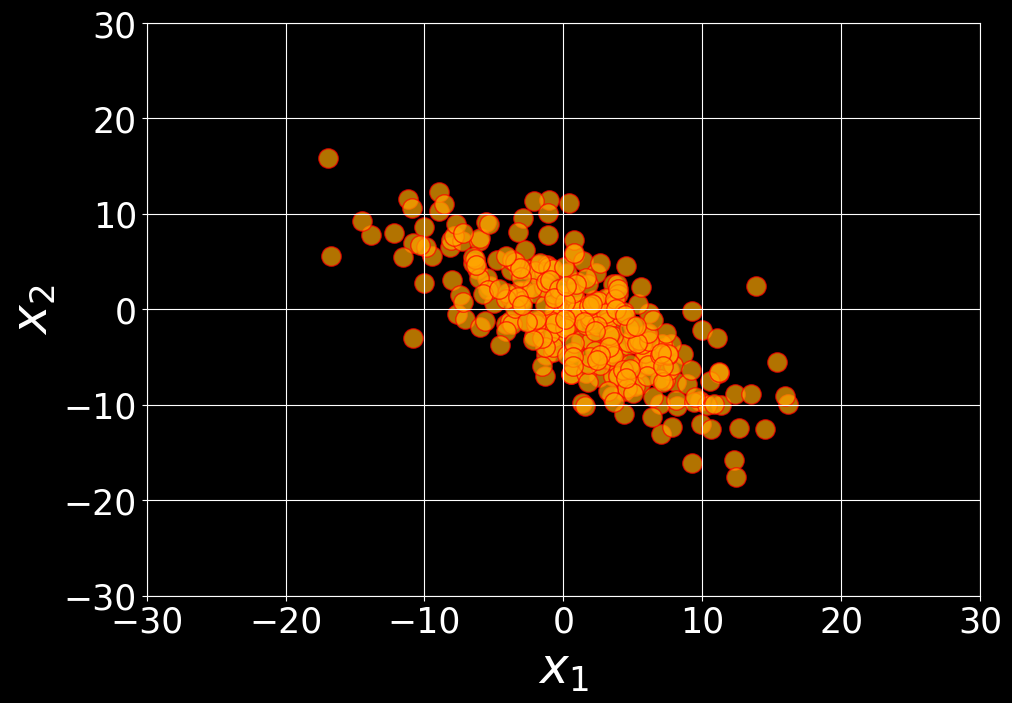

In [28]:
# Координаты Центра
C1 = 1
C2 = -1
# Радиусы
S1 = 3
S2 = 8
# Угол наклона
theta = 45 
# Количество точек
N = 300

X = create_elipsoid_data(C1 = C1, C2 = C2, S1 = S1, S2 = S2, theta = theta, N = N, random_state = 42) 

fig  = plt.figure(figsize=(10,7))
plt.scatter(X[:, 0],X[:, 1],
            alpha = 0.7, s = 196,
            c = 'orange', edgecolor = 'r');
plt.grid()

plt.xlabel(r'$x_1$',fontsize=35)
plt.ylabel(r'$x_2$',fontsize=35)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.tight_layout()
plt.xlim((-30,30))
plt.ylim((-30,30));

### 1.1.2. Применяем метод главных компонент
Используем класс PCA и применяем его к нашему набору данных:

In [29]:
pca = PCA_synth(n_components = 2)
pca.fit(X)
pca.score(X)

1.0

### 1.1.3. Визуализируем пространство главных компонент

Всё работает как надо:

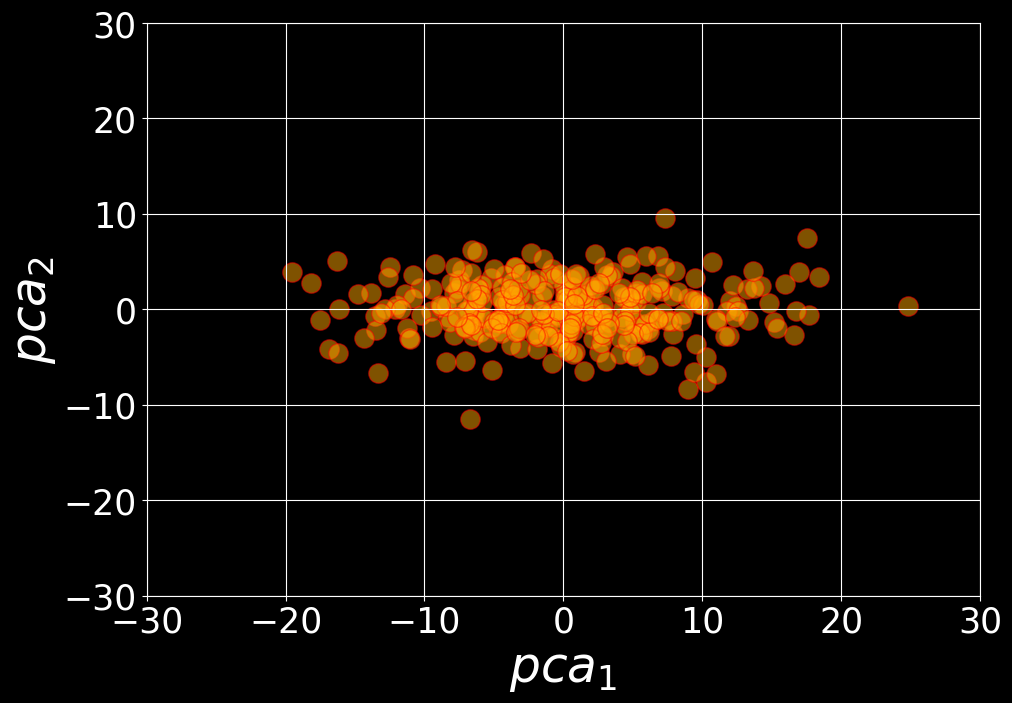

In [30]:
X_new = pca.transform(X)

fig  = plt.figure(figsize=(10,7))

plt.scatter(X_new[:, 0],X_new[:, 1],
            alpha = 0.5, s = 196,
            c = 'orange', edgecolor = 'r');
plt.grid()
plt.xlabel(r"$pca_1$",fontsize=35)
plt.ylabel(r"$pca_2$",fontsize=35)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25);
plt.tight_layout()
plt.xlim((-30,30))
plt.ylim((-30,30));

### 1.1.4. Оценки
Оцениваем собственные значения, собственные вектора, а также распределение минимальных и максимальных значений в пространстве главных компонент:

In [31]:
Eigen_Vectors = pca.components
Eigen_Values = pca.values

Ниже представлены значения собственных векторов для данного распределения:

In [32]:
Eigen_Vectors

array([[-0.71987456, -0.69410419],
       [ 0.69410419, -0.71987456]])

Также выведем собственные значения. Как и ожидалось, первое из них значительно больше второго:

In [33]:
Eigen_Values

array([59.19813691,  8.70096707])

Аффинное преобразование единичной окружности:

In [34]:
X_mean = np.mean(X, axis = 0)

theta_ = 2 * np.pi * np.arange(0,1,0.01)

X_std = Eigen_Vectors @ np.diag(np.sqrt(Eigen_Values)) @ np.array([np.cos(theta_),np.sin(theta_)])

Выведем исходные данные, элипсы стандартных отклонений и базис главных компонент. Немного поиграемся с цветами для разнообразия:

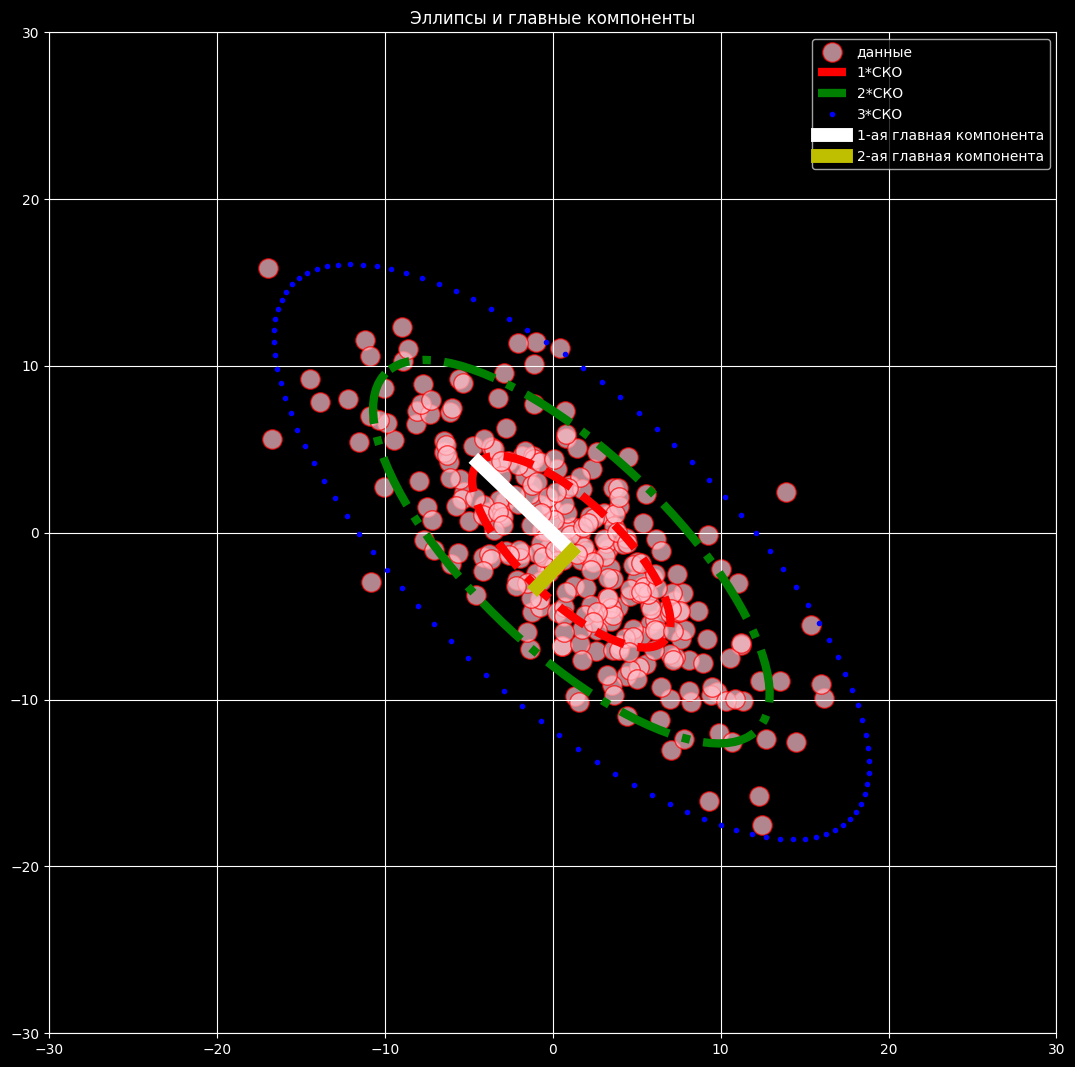

In [35]:
fig = plt.figure(figsize=(13,13))
# рисуем данные
plt.scatter(X[:,0],X[:,1], alpha = 0.7, label = 'данные',s = 196, c = 'pink', edgecolor = 'r')
# рисуем эллипс с "диаметром" ~ 1*СКО
plt.plot(X_std[0,:]+X_mean[0],X_std[1,:]+X_mean[1], 
         '--', c = 'r', linewidth = 6, label = '1*СКО')
#рисуем эллипс с "диаметром" ~ 2*СКО
plt.plot(2*X_std[0,:]+X_mean[0],2*X_std[1,:]+X_mean[1],
         '-.', c = 'g', linewidth = 6, label = '2*СКО')
#рисуем эллипс с "диаметром" ~ 3*СКО
plt.plot(3*X_std[0,:]+X_mean[0],3*X_std[1,:]+X_mean[1],
         '.', c = 'b', linewidth = 6, label = '3*СКО')
# 1-ая главная компонента
plt.plot(np.array([X_mean[0], X_mean[0]+Eigen_Vectors[0,0]*np.sqrt(Eigen_Values[0])]),
         np.array([X_mean[1], X_mean[1]+Eigen_Vectors[1,0]*np.sqrt(Eigen_Values[0])]),
         'w',linewidth = 10, label = '1-ая главная компонента')
# 2-ая главная компонента
plt.plot(np.array([X_mean[0], X_mean[0]+Eigen_Vectors[0,1]*np.sqrt(Eigen_Values[1])]),
         np.array([X_mean[1], X_mean[1]+Eigen_Vectors[1,1]*np.sqrt(Eigen_Values[1])]),
         'y',linewidth = 10, label = '2-ая главная компонента')
plt.xlim((-30,30))
plt.ylim((-30,30));
plt.title('Эллипсы и главные компоненты')
plt.legend()
plt.grid()

### 1.1.5. Вывод

Красивое :)

## 1.2. Набор данных MNIST
*	Загрузите данные MNIST. Поэкспериментируйте с количеством компонент при применении метода главных компонент.
*	Оцените качество восстановления при разных значениях размерности собственного пространства (проверьте хотя бы 2 различных варианта).
*	В пространстве главных компонент для данных MNIST определите, каким цифрам соответствуют точки со следующими координатами:
*	PCA-1 -7; PCA-2 0; 
*	PCA-1 4; PCA-4 1;
*	PCA-3 0; PCA-4 5;
*	PCA-3 -4; PCA-2 -3.


### 1.2.1. Загружаем данные

Загрузим датасет:

In [36]:
X, y  = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame = True, parser='auto')
X = X / 255.
X_ = X.values

X

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0          0.0  ...       0.0       0.0       0.0       0.0       0.0   
1          0.0  ...       0.0       0.0       0.0       0.0       0.0   
2          0.0  ...       0.0       0.0       0.0       0.0       0.0   
3          0.0  ...       0.0       0.0       0.0       0.0       0.0   
4          0.0  ...       0.0       0.0       0.0       0.0       0.0   
...        ...  ...       ...       ...       ...       ...       ...   
69995      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69996      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69997      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69998      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69999      0.0  ...       0.0       0.0       0.0       0.0       0.0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
0           0.0       0.0       0.0       0.0       0.0  
1           0.0       0.0       0.0       0.0       0.0  
2           0.0       0.0       0.0       0.0       0.0  
3           0.0       0.0       0.0       0.0       0.0  
4           0.0       0.0       0.0       0.0       0.0  
...         ...       ...       ...       ...       ...  
69995       0.0       0.0       0.0       0.0       0.0  
69996       0.0       0.0       0.0       0.0       0.0  
69997       0.0       0.0       0.0       0.0       0.0  
69998       0.0       0.0       0.0       0.0       0.0  
69999       0.0       0.0       0.0       0.0       0.0  

[70000 rows x 784 columns]

Визуализируем:

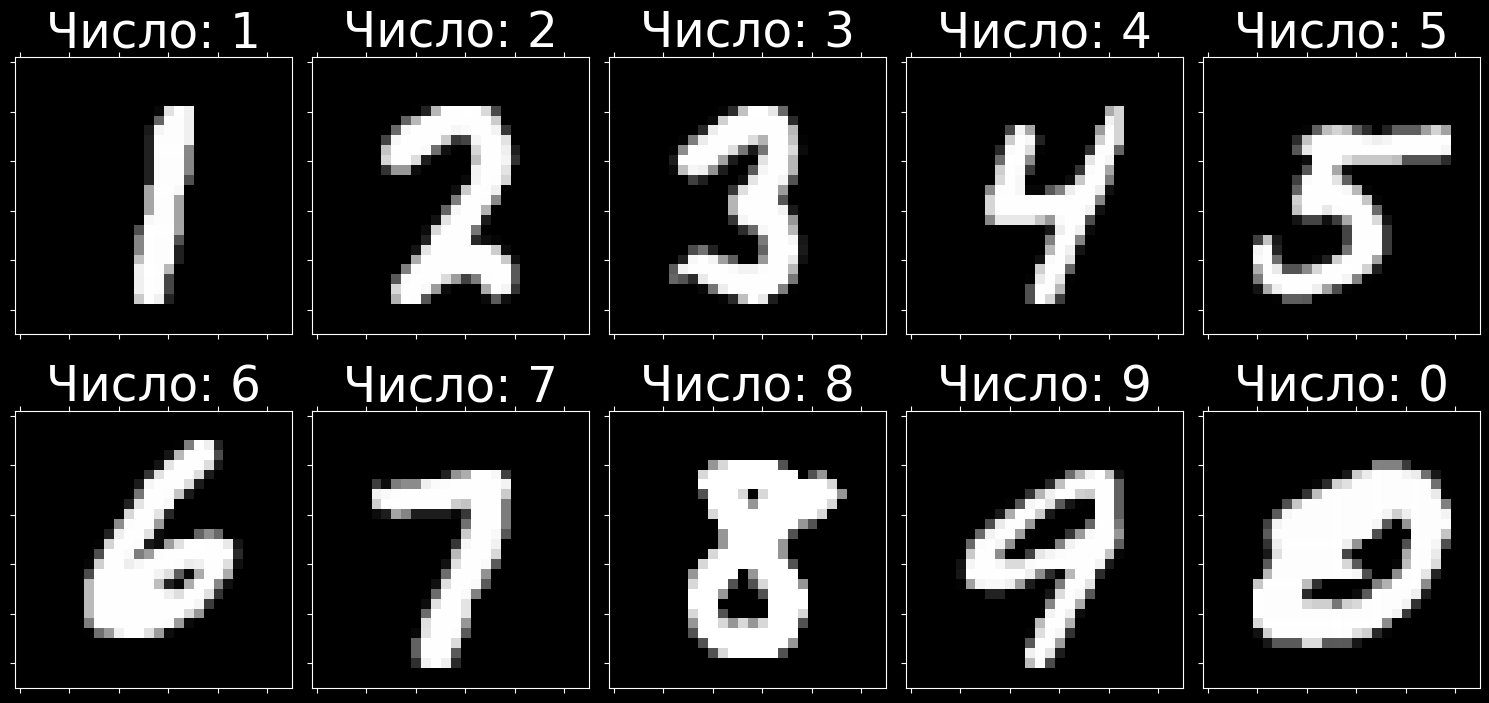

In [37]:
# Выбираем поднабор данных:
n =  69984

fig = plt.figure( figsize=(15,8) )
for i in range(0,10):
  ax = fig.add_subplot(2,5,i+1)
  ax.set_title("Число: {}".format(str(y[i+n]) ), size=35)
  ax.matshow(1-X.loc[i+n,'pixel1':'pixel784'].values.reshape((28,28)).astype(float),
             cmap='Greys')
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)
  plt.tight_layout()

### 1.2.1. Метод главных компонент и оценка восстановления данных

Применим метод главных компонент к нашим данным. Рассмотрим два случая для разного числа главных компонент.

#### 1) N = 4
Из интереса возьмем только 4 компоненты. Оценка PCA составляет 49%:

In [38]:
pca = PCA_synth(n_components = 4)
pca.fit(X_)
pca.score(X_)

0.4940454136969361

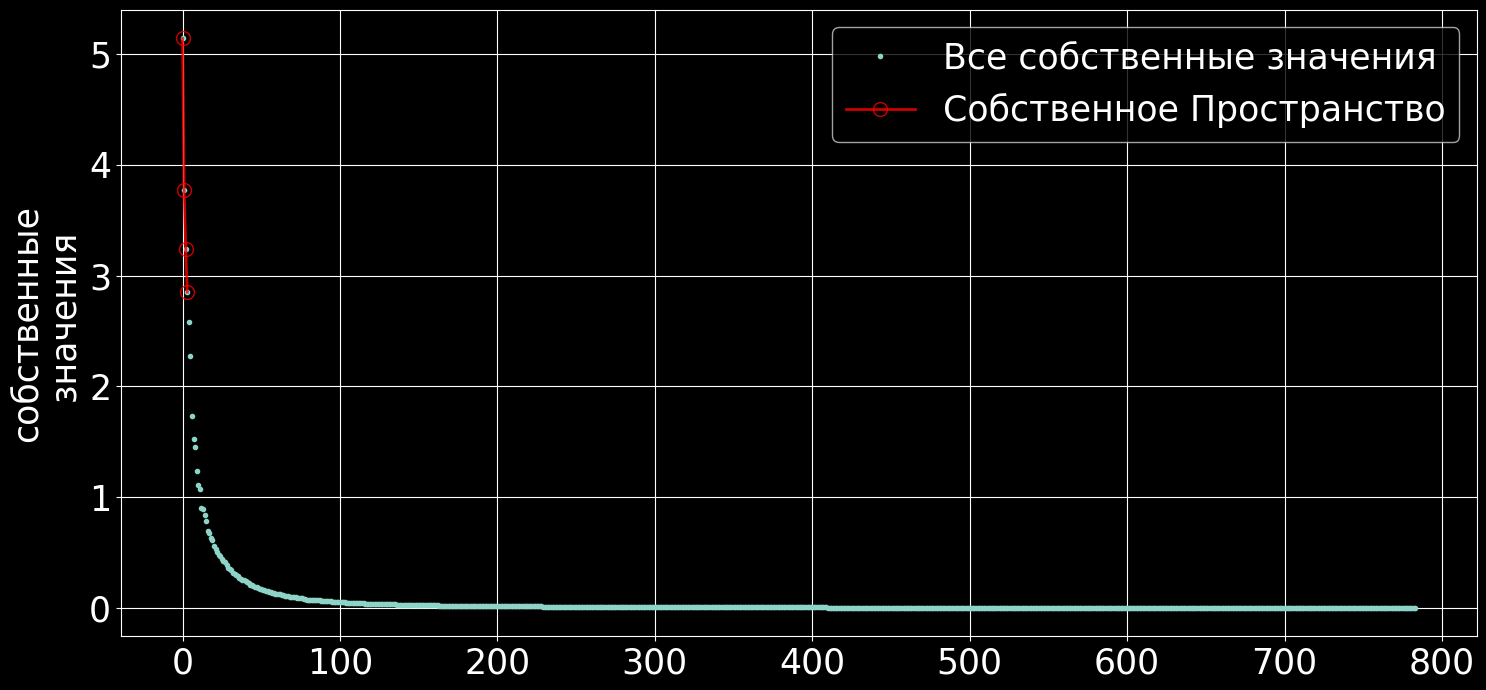

In [39]:
pca.plot_eigvalues();

In [40]:
pca_result_mnist = pca.transform(X_)
pca_inverse = pca.inverse_transform(pca_result_mnist)
pca_inverse.shape

(70000, 784)

Восстановление данных:

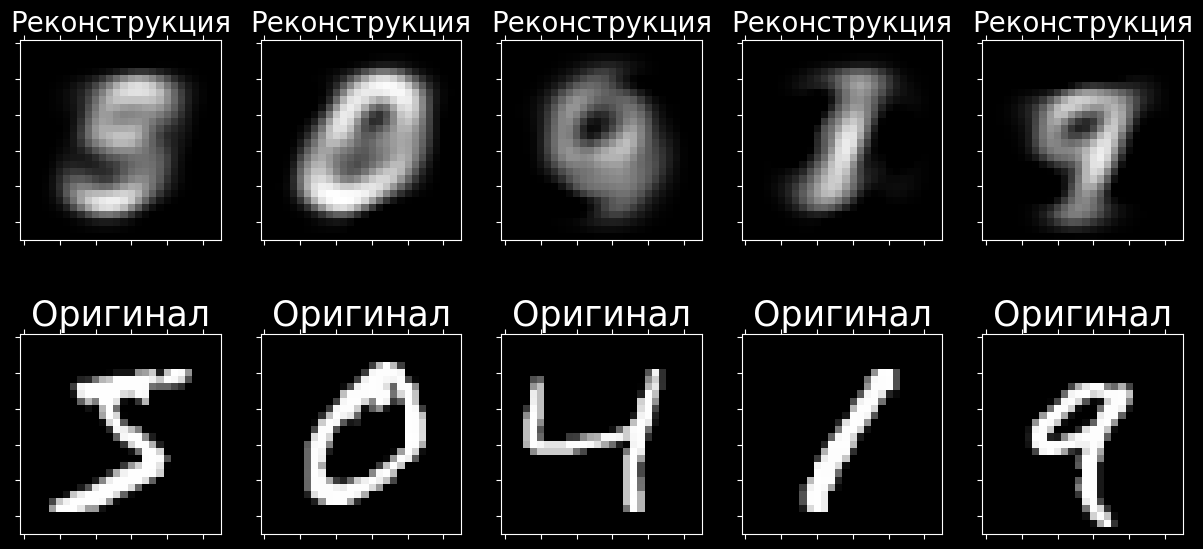

In [41]:
fig=plt.figure(figsize=(15,7))
for i in range(0,5):
  ax = fig.add_subplot(2,5,i+1)
  ax.set_title("Реконструкция", size=20)  
  ax.matshow(1-pca_inverse[i,:].reshape((28,28)).astype(float),cmap='Greys', vmin = 0, vmax = 1)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)

for i in range(0,5):
  ax = fig.add_subplot(2,5,i+6)
  ax.set_title("Оригинал", size=25)    
  ax.matshow(1-X_[i,:].reshape((28,28)).astype(float),cmap='Greys', vmin = 0, vmax = 1)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)

Видим, что четырех компонент явно недостаточно. Некоторые цифры типа 0, 1 и 9 читаются относительно неплохо, однако 5 уже скорее похожа на 9, а 4 вообще близка к 0. Кроме того, цифры получаются очень размытыми.

#### 2) N = 30
При использовании 30 компонент ситуация уже несколько улучшается, оценка PCA составляет 81%:

0.8102161288375815


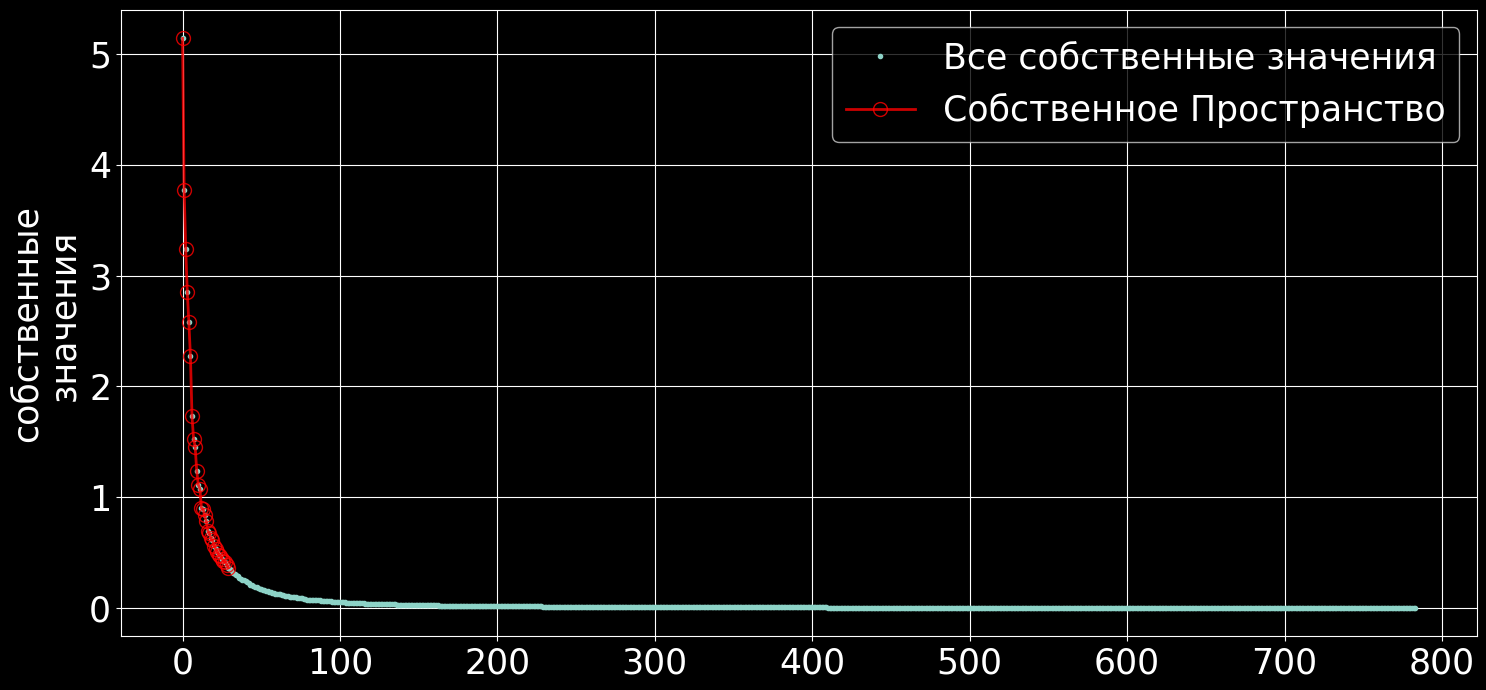

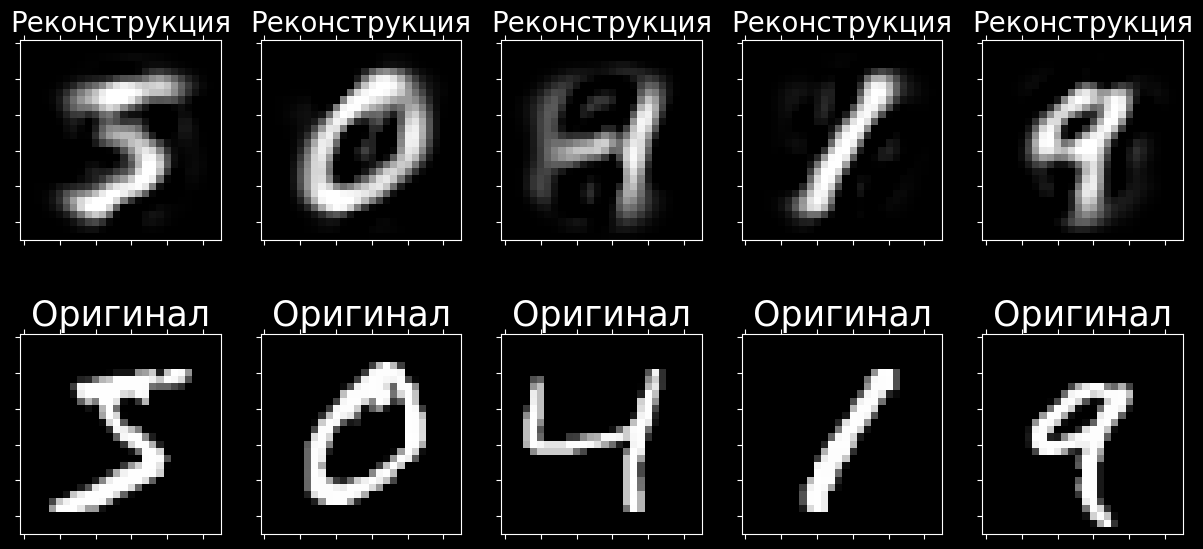

In [42]:
pca = PCA_synth(n_components = 30)
pca.fit(X_)
print(pca.score(X_))

pca.plot_eigvalues();

pca_result_mnist = pca.transform(X_)
pca_inverse = pca.inverse_transform(pca_result_mnist)

fig=plt.figure(figsize=(15,7))
for i in range(0,5):
  ax = fig.add_subplot(2,5,i+1)
  ax.set_title("Реконструкция", size=20)  
  ax.matshow(1-pca_inverse[i,:].reshape((28,28)).astype(float),cmap='Greys', vmin = 0, vmax = 1)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)

for i in range(0,5):
  ax = fig.add_subplot(2,5,i+6)
  ax.set_title("Оригинал", size=25)    
  ax.matshow(1-X_[i,:].reshape((28,28)).astype(float),cmap='Greys', vmin = 0, vmax = 1)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)

Четверку все ещё немножко шакалит, но она уже выглядит значительно более похожей на себя, чем раньше. Остальные цифры уже относительно неплохо оформлены.

#### 3) N = 150
Возьмем 150 компонент. Оценка для метода главных компонент повысилась аж до 96%:

0.9635915926454999


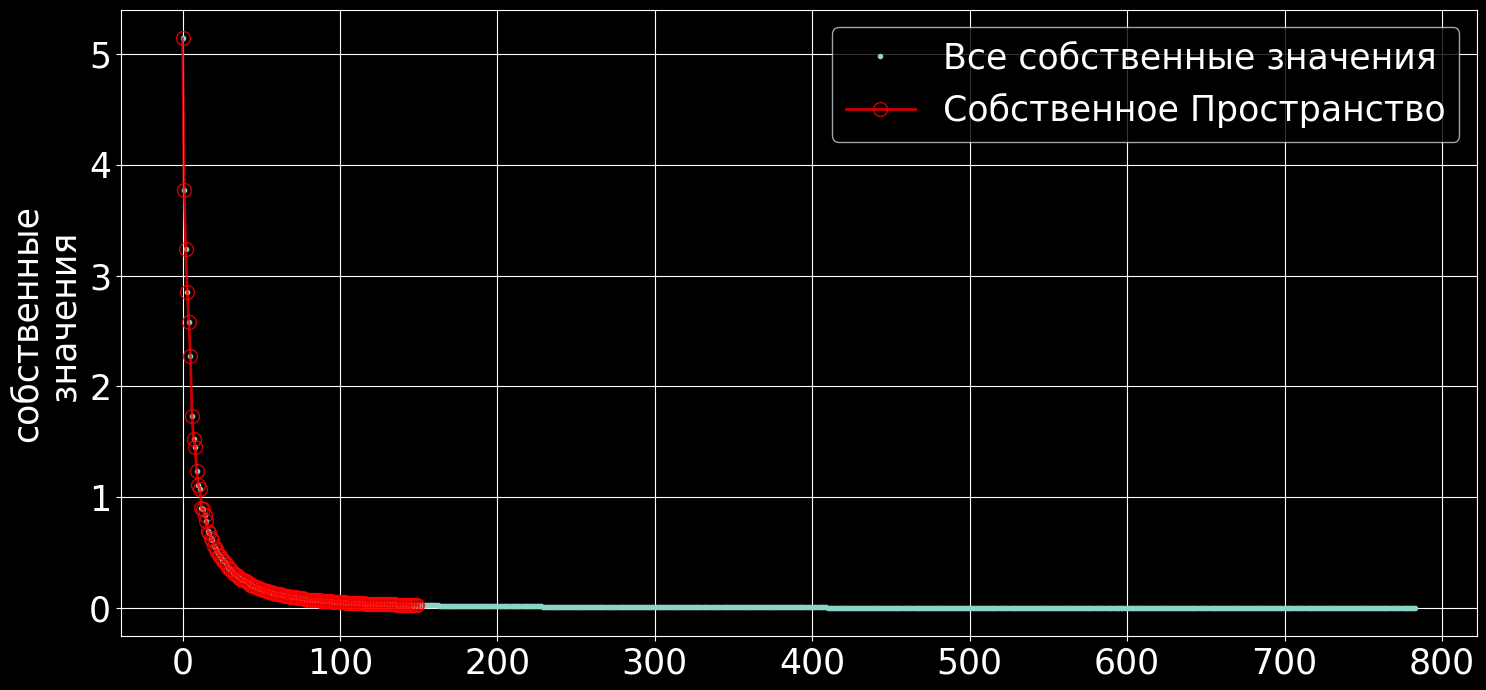

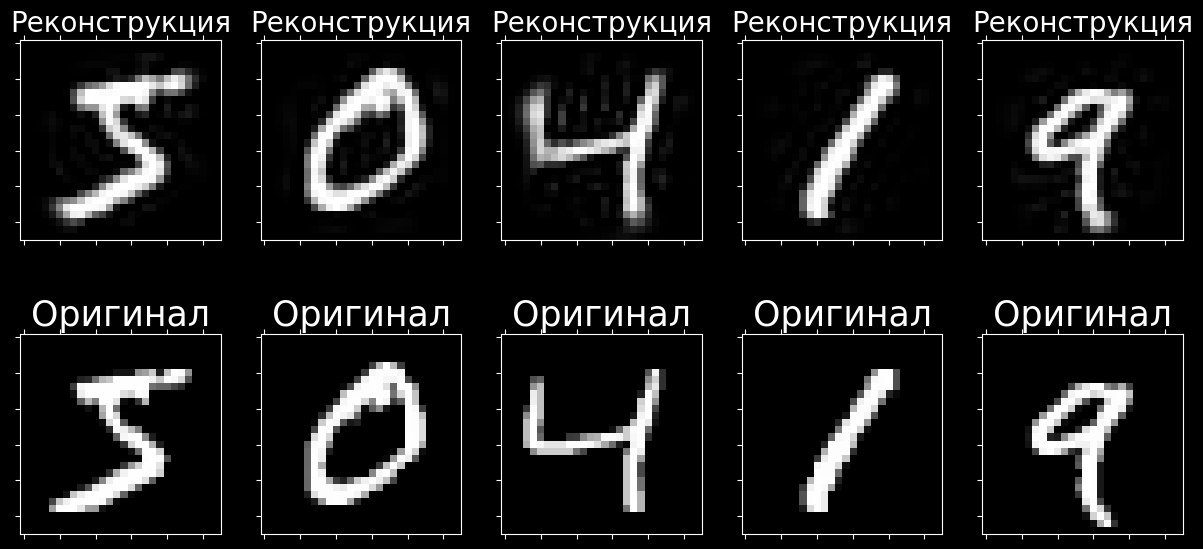

In [43]:
pca = PCA_synth(n_components = 150)
pca.fit(X_)
print(pca.score(X_))

pca.plot_eigvalues();

pca_result_mnist = pca.transform(X_)
pca_inverse = pca.inverse_transform(pca_result_mnist)

fig=plt.figure(figsize=(15,7))
for i in range(0,5):
  ax = fig.add_subplot(2,5,i+1)
  ax.set_title("Реконструкция", size=20)  
  ax.matshow(1-pca_inverse[i,:].reshape((28,28)).astype(float),cmap='Greys', vmin = 0, vmax = 1)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)

for i in range(0,5):
  ax = fig.add_subplot(2,5,i+6)
  ax.set_title("Оригинал", size=25)    
  ax.matshow(1-X_[i,:].reshape((28,28)).astype(float),cmap='Greys', vmin = 0, vmax = 1)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)

Теперь все цифры отчетливо видны и различимы. Есть некоторые шумы вокруг основных контуров, но они незначительны и не мешают восприятию. 

### 1.2.2. Пространство главных компонент

Построим пространство 4 главных компонент:

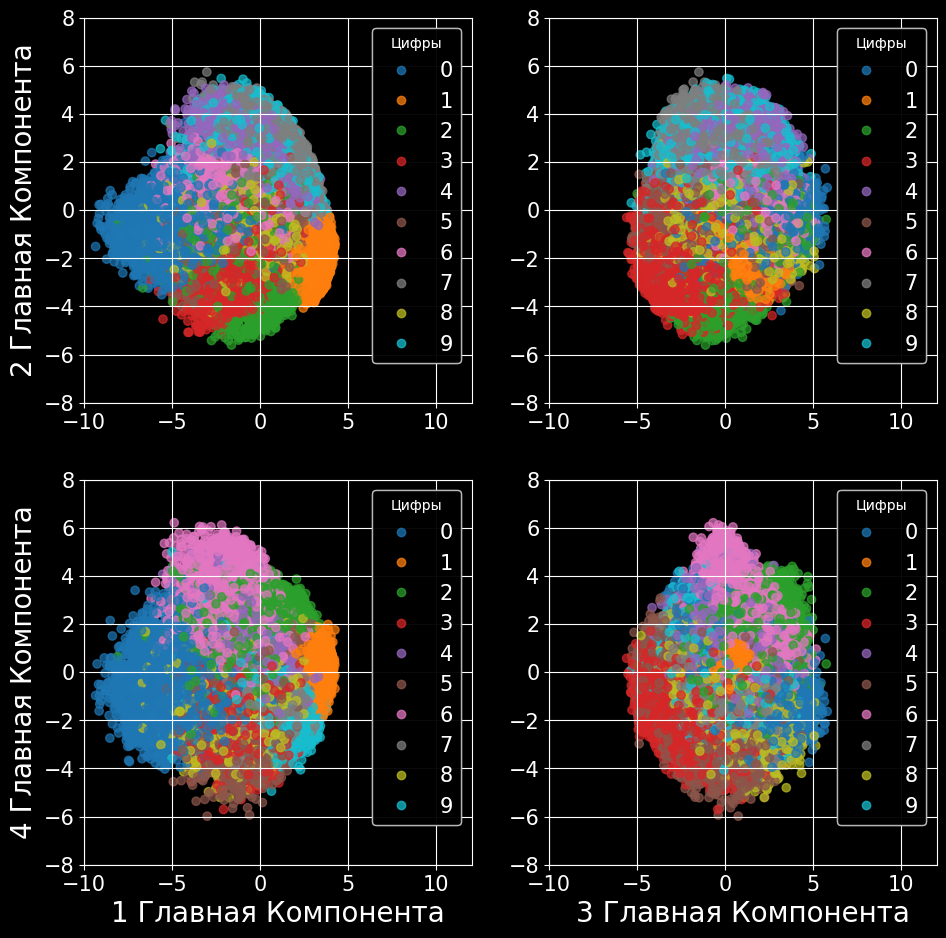

In [44]:
pca_names = [str(x+1) + ' Главная Компонента' for x in range(4)]
plot_multi(pca_result_mnist, y.astype(int), pca_names);

Посмотрим, как выглядят первые собственные вектора:

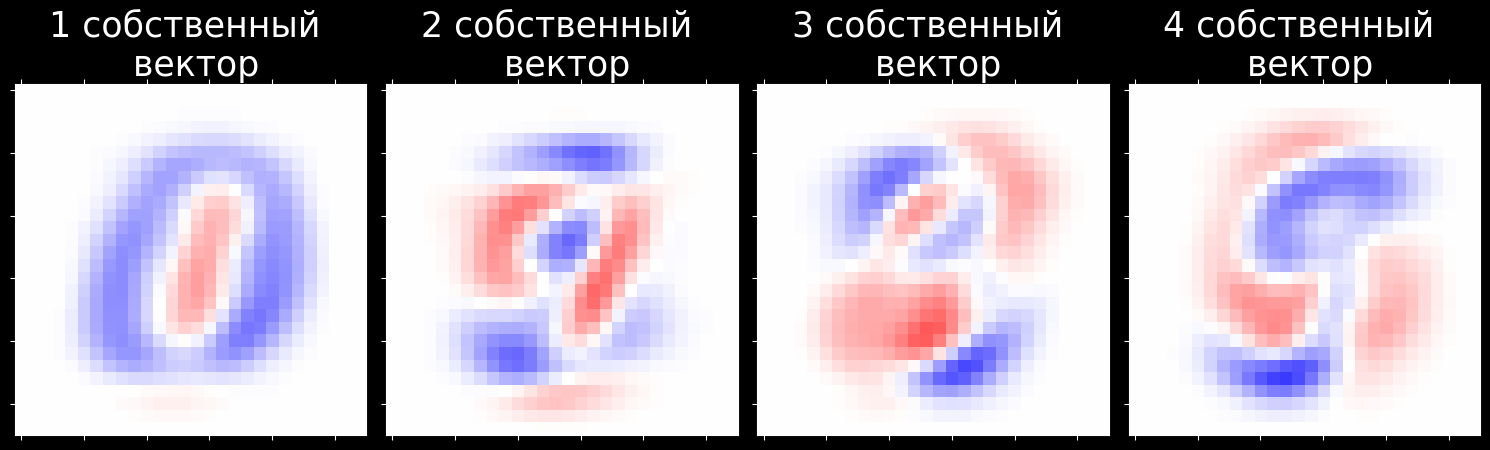

In [45]:
W_pca=pca.components.T
fig=plt.figure(figsize=(15,5))
for i in range(0,4):
  ax = fig.add_subplot(1,4,i+1,title=str(i+1) )
  ax.set_title("{} собственный \n вектор".format(str(i+1)), size=25)
  ax.matshow(W_pca[i].reshape((28,28)).astype(float), cmap = 'bwr', vmin=-0.20,vmax = 0.20)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)
plt.tight_layout();

Теперь определим, каким цифрам соответствуют точки со следующими координатами:
*	PCA-1 -7; PCA-2 0; 
*	PCA-1 4; PCA-4 1;
*	PCA-3 0; PCA-4 5;
*	PCA-3 -4; PCA-2 -3.


#### 1) *PCA-1 -7; PCA-2 0* **соответствует 0**.

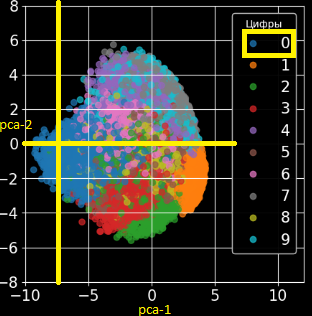

#### 2) *PCA-1 4; PCA-4 1* **соответствует 1**.

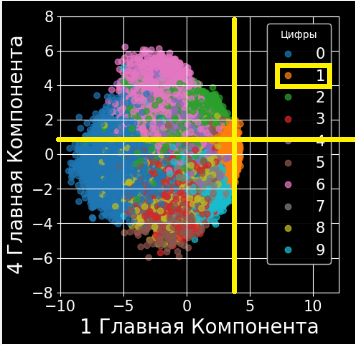

#### 3) *PCA-3 0; PCA-4 5* **соответствует 6**.

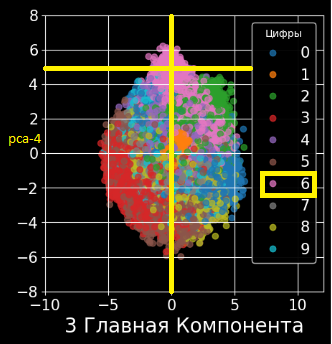

#### 4) *PCA-3 -4; PCA-2 -3* **соответствует 3**.

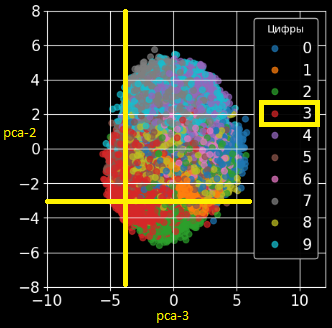

### 1.2.3. Вывод

Всё ещё более красивое :)

## 1.3. Набор данных Cars Moldova

*	Примените метод главных компонент для набора данных Cars (сразу очищенный от дубликатов и выбросов, лучше с добавленными признаками из «Задания 1»).
*	Выполните визуализацию пространства главных компонент и их связь с исходными признаками.
*	Примените пространство главных компонент в качестве входных данных для алгоритмов регрессии или классификации (на ваш выбор). Сравните результаты.


### 1.3.1. Загружаем датасет

Сразу же удалим столбец Years:

In [46]:
df = pd.read_csv('content/cars_moldova_cat_num.csv', delimiter = ',')
df = df.drop('Year', axis=1)
df

Make  Model  Style  Distance  Engine_capacity(cm3)  Fuel_type  \
0        40     92      4  195000.0                1800.0          2   
1        32     62     11  135000.0                1500.0          0   
2        32     71     11  110000.0                1500.0          0   
3        28     23     11  200000.0                1600.0          3   
4        23    124      5  300000.0                2200.0          0   
...     ...    ...    ...       ...                   ...        ...   
32069    42     88     10   88000.0                1800.0          4   
32070    19     53      3  225000.0                1800.0          3   
32071     6     77     11   89000.0                1500.0          0   
32072    22     10      1  370000.0                2000.0          0   
32073    32     62      6  300000.0                1500.0          0   

       Transmission  Price(euro)  Age       km_year  
0                 1       7750.0   11  17727.272727  
1                 0       8550.0    8  16875.000000  
2                 0       6550.0   10  11000.000000  
3                 0       4100.0   16  12500.000000  
4                 0       3490.0   22  13636.363636  
...             ...          ...  ...           ...  
32069             1      11500.0    6  14666.666667  
32070             0       4400.0   20  11250.000000  
32071             0       7000.0    7  12714.285714  
32072             0       4000.0   16  23125.000000  
32073             0       4000.0   16  18750.000000  

[32074 rows x 10 columns]

### 1.3.2. Применим метод главных компонент
Предварительно нормализуем величины:

In [47]:
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
num_columns = ['Age', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']
df_num = df[num_columns].copy()

scaler = MinMaxScaler()
X = scaler.fit_transform(df_num)
labels = df.Transmission.values

pca = PCA_cars(n_components = 4)
pca.fit(X)
X_new = pca.transform(X)

### 1.3.3. Выполним визуализацию

Для начала визуализируем:
* Пространство главных компонент (pca-1/pca-2);
* Значения собственных векторов
* Восстановление исходных данных

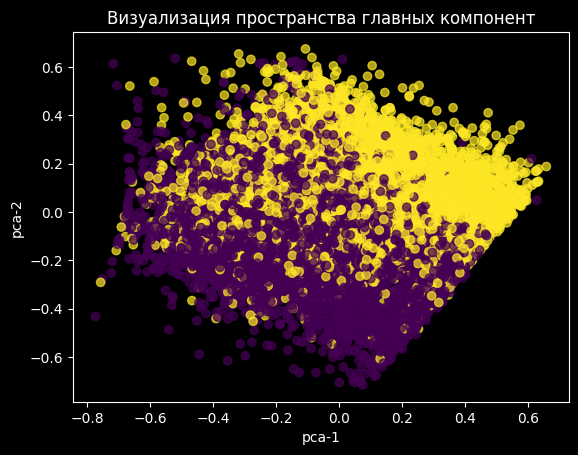

eigenvalues [0.0432144  0.03199174 0.01798884 0.00375675 0.00275689]


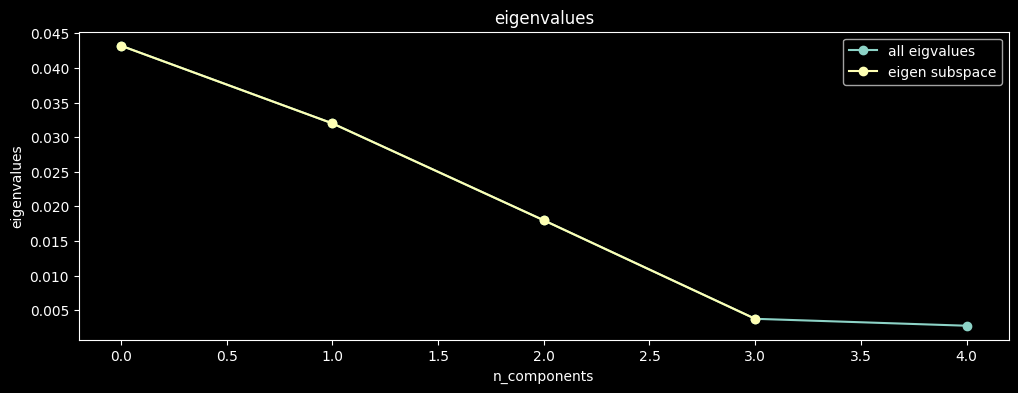

score: 0.9811459566209652


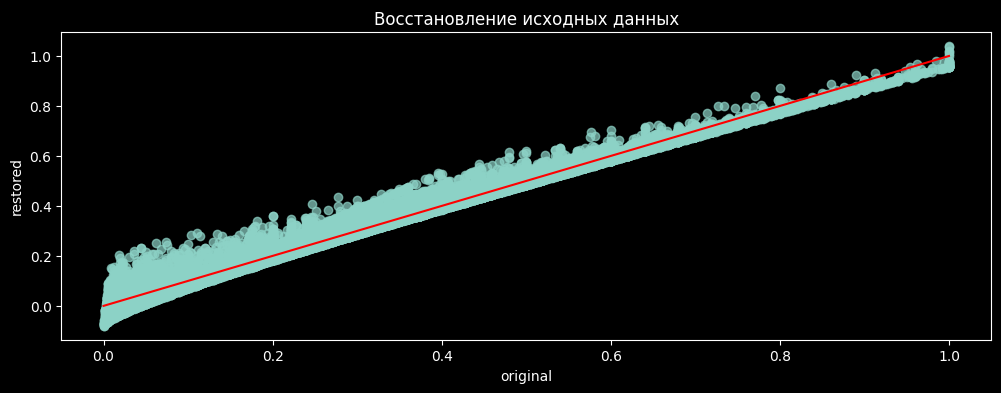

In [48]:
plt.title('Визуализация пространства главных компонент')
plt.scatter(X_new[:,0], 
            X_new[:,1], 
            c =labels, 
            alpha = 0.7
            );
plt.xlabel('pca-1')
plt.ylabel('pca-2'); 
plt.show()

print('eigenvalues',pca.values)
pca.plot_eigvalues()

print('score:',pca.score(X))

X2 = pca.inverse_transform(X_new)
plt.figure(figsize=(12,4))
plt.scatter(X[:,1],X2[:,1],alpha = 0.7 )
plt.plot([X[:,1].min(),X[:,1].max()],[X[:,1].min(),X[:,1].max()], 'r')
plt.title('Восстановление исходных данных')
plt.xlabel('original')
plt.ylabel('restored');

Визуализируем веса метода главных компонент, чтобы соотнести их с конкретными параметрами:

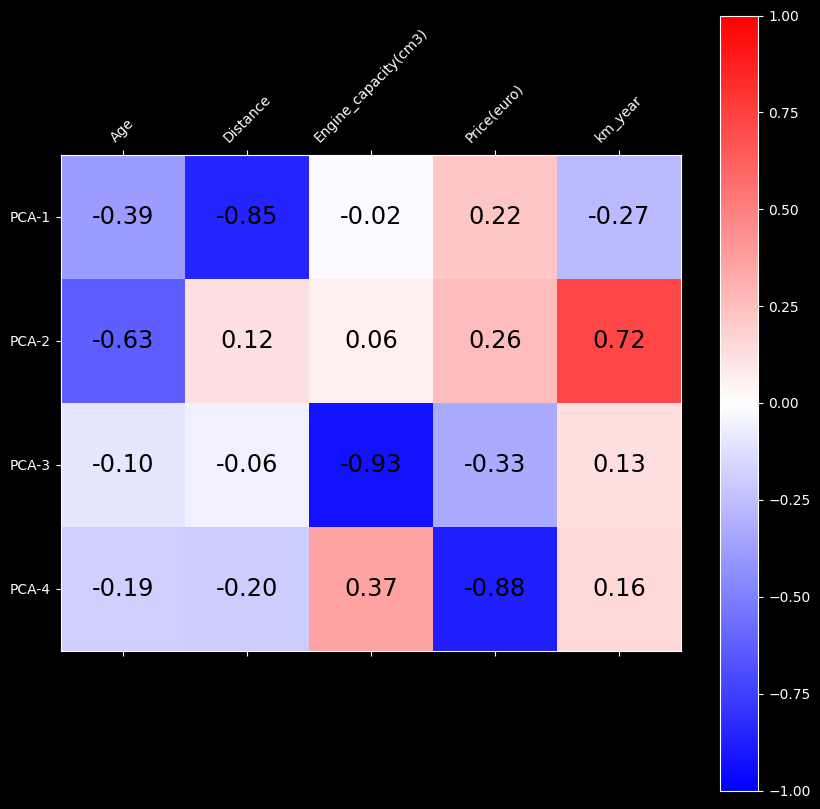

In [49]:
fig=plt.figure(figsize=(10,10))
W = pca.components.T
pca_names = ['PCA-'+str(x+1) for x in range(4)]
plt.matshow(W.astype(float),cmap='bwr',vmin=-1,vmax=1, fignum=1)
for (i, j), z in np.ndenumerate(W):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', color = 'k', fontsize = 'xx-large')
plt.xticks(np.arange(0, W.shape[1]), df[num_columns].columns,rotation = 45)
plt.yticks(np.arange(0, W.shape[0]),pca_names)
plt.colorbar();

Так мы видим, что:
* PCA-1 связана с параметром 'Distance';
* PCA-2 связана с параметром 'Age' (параметр 'km_year' не считается, так как взаимосвязан с 'Age');
* PCA-3 связана с параметром 'Engine_capacity(cm3)';
* PCA-4 связана с параметром 'Price'.

Выполним визуализацию пространства 4 главных компонент друг от друга:

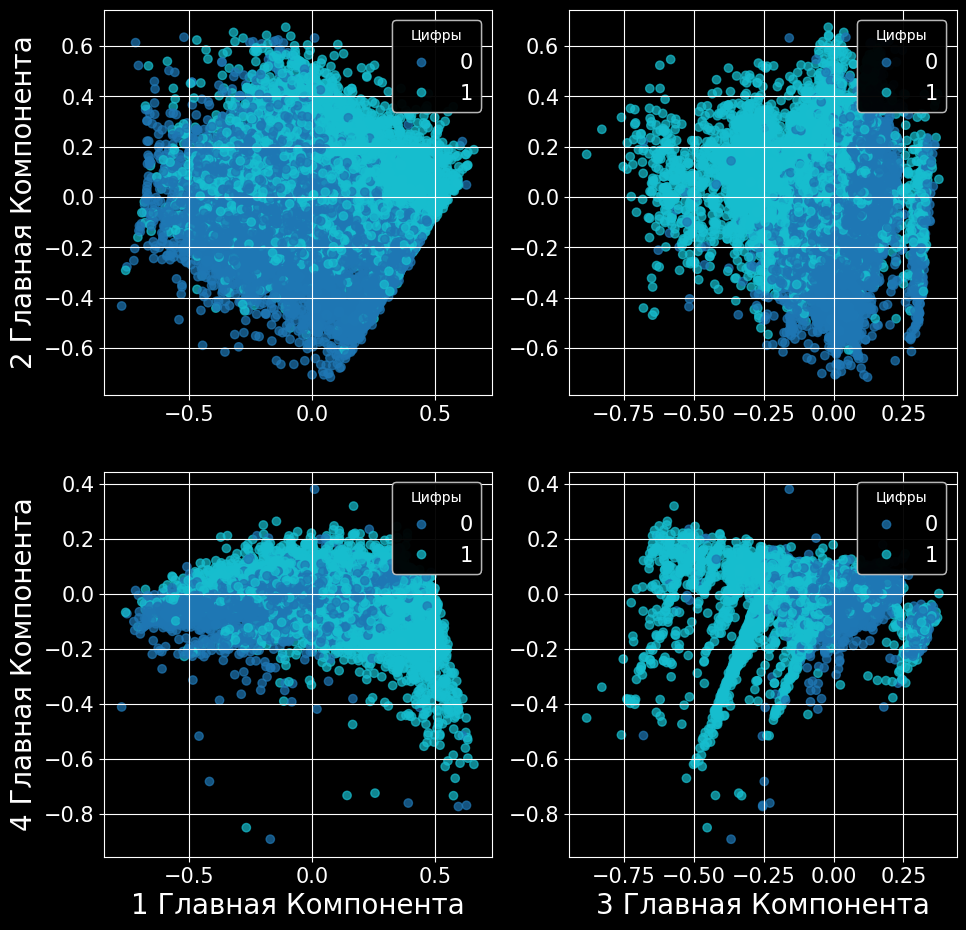

In [50]:
y = df.Transmission.values
pca_result_mnist = pca.transform(X)
pca_inverse = pca.inverse_transform(pca_result_mnist)

pca_names = [str(x+1) + ' Главная Компонента' for x in range(4)]
plot_multi_1(pca_result_mnist, y.astype(int), pca_names);

### 1.3.4. Используем пространство главных компонент как входные данные

#### 1) Линейная регрессия
Для начала рассмотрим линейную регрессию с нормализованными данными. В качестве целевой метрики используем цену:

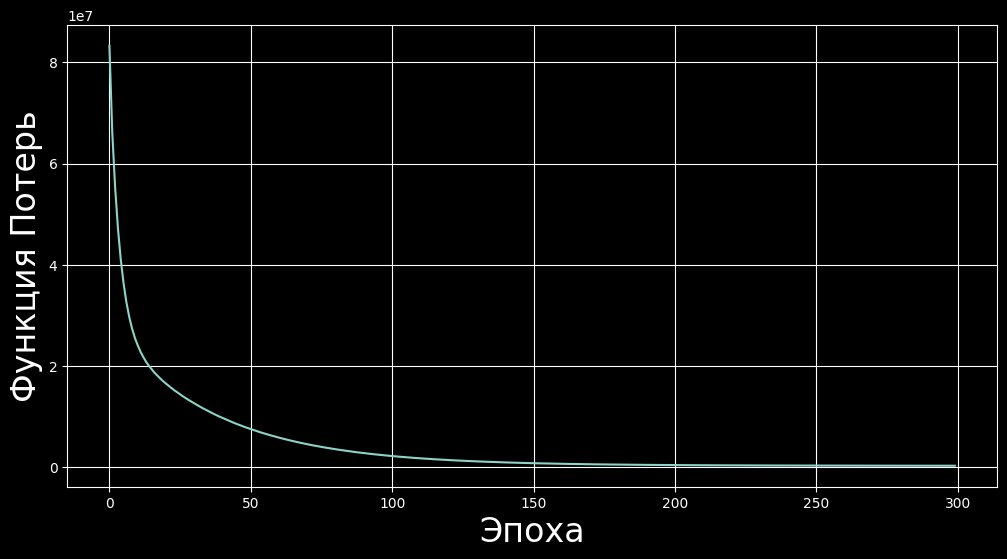

train R2: 0.9977; test R2: 0.9980


In [51]:
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
num_columns = ['Age', 'Distance', 'Engine_capacity(cm3)', 'km_year']

X = X_new
y = df['Price(euro)'].values
features_names = df[num_columns].columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler  = MinMaxScaler()
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train) 
X_test  = scaler.transform(X_test) 

regr_linear = LinearRegression(learning_rate=0.1,
                        epochs=300,batch_size=500,
                        n_batches=None)

regr_linear.fit(X_train, y_train)
regr_linear.plot_cost()
print( 'train R2: %.4f; test R2: %.4f' % (regr_linear.score(X_train, y_train), regr_linear.score(X_test, y_test)))

Точность получилась очень высокой.

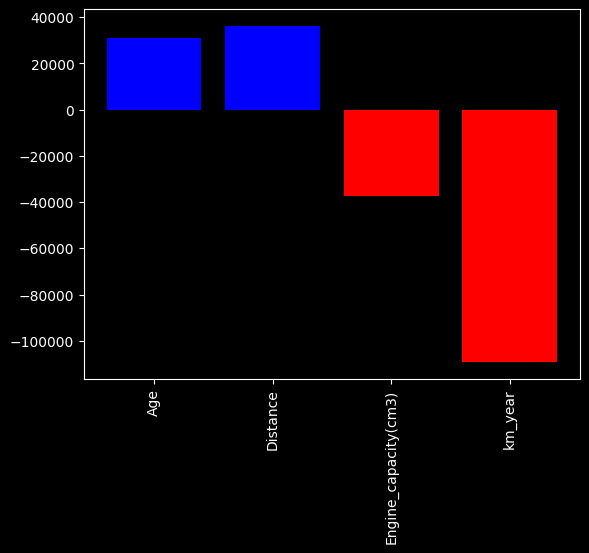

In [52]:
w, b = regr_linear.get_w_and_b()

vis_weigths(w, features_names)

Здесь видим неплохое совпадение тенденций с разницей в значениях и знаках. В случае линейной регрессии на нормализованных данных знаки весов пробега и возраста были отрицательными, а при использовании собственных значений стали положительными. То же самое наблюдаем и для объема двигателя с пробегом за год с обратными знаками. Сильно отличаются соотношения, но в целом схема рабочая, плюс точность стала значительно более высокой.

*Линейная регрессия на исходных нормализованных данных:*

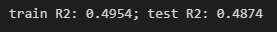

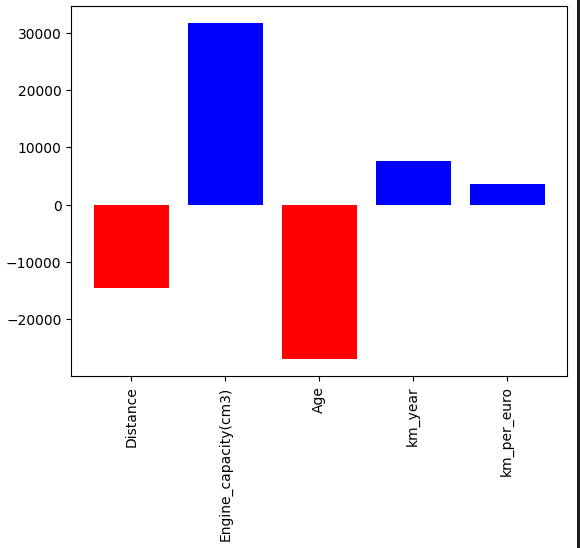

#### 2) Линейная регрессия
Теперь воспользуемся логистической регрессией с целевой переменной **'Transmission'** и предварительно нормализованными данными:

0         1         2         3         4
22446  0.435009  0.445142  0.657177  0.694902  0.263938
22447  0.458249  0.542128  0.563406  0.736357  0.256332
22448  0.377596  0.536181  0.681855  0.687984  0.235875
22449  0.368300  0.539809  0.651358  0.707137  0.233955
22450  0.285151  0.196186  0.906260  0.532694  0.502308

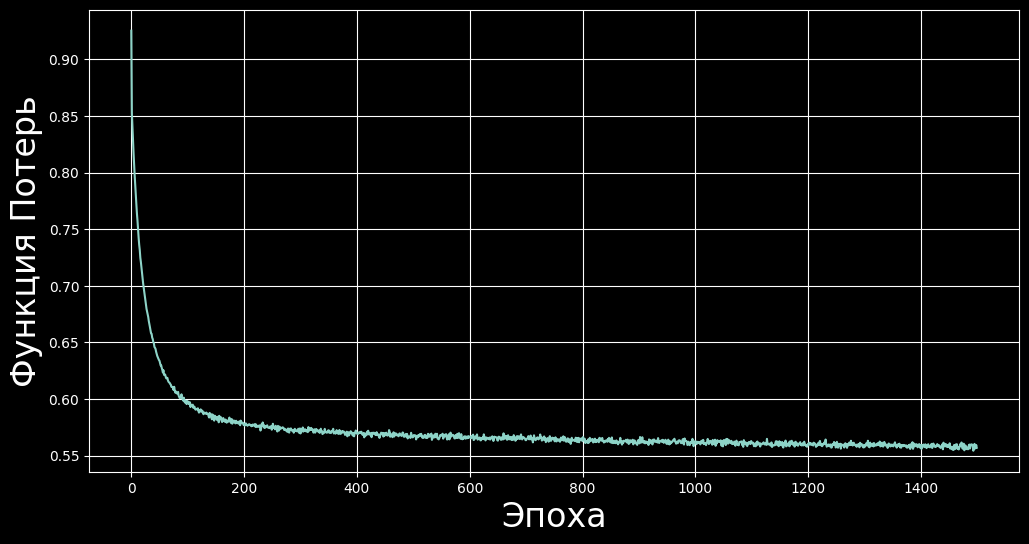

train Accuracy: 0.8075; test Accuracy: 0.8177
True Positives:0.8335	True Negatives:0.8069
False Positives:0.1665	False Negatives:0.1931
Accuracy:0.8177
Recall:0.7481	Precision:0.8335
f1 measure:0.7885


In [53]:
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
num_columns = ['Age', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']
df_num = df[num_columns].copy()

scaler = MinMaxScaler()
X = scaler.fit_transform(df_num)
labels = df.Transmission.values

pca = PCA_cars(n_components = 5)
pca.fit(X)
X_new = pca.transform(X)

X = X_new 
y = df["Transmission"].values 
features_names = df[num_columns].columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test) 
display(pd.DataFrame(X_train).tail())

regr = LogisticRegression(learning_rate=0.8,epochs=1500,batch_size=5000)

regr.fit(X_train, y_train)

regr.plot_cost()
print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))
regr.classification_report(X_test, y_test)

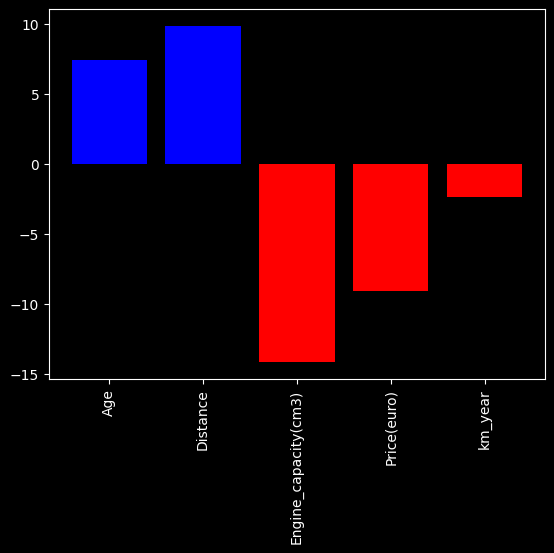

In [54]:
w, b = regr.get_w_and_b()

vis_weigths(w, features_names)

В данном случае разница более заметна:
* Знаки весов будто поменялись на противоположные;
* Стал сильнее "выпирать" столбец пробега;
* Максимальный по модулю вес теперь принадлежит объему двигателя, а не цене.


*Логистическая регрессия на исходных нормализованных данных:*

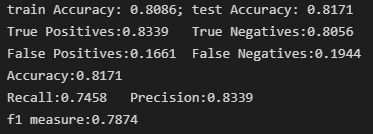

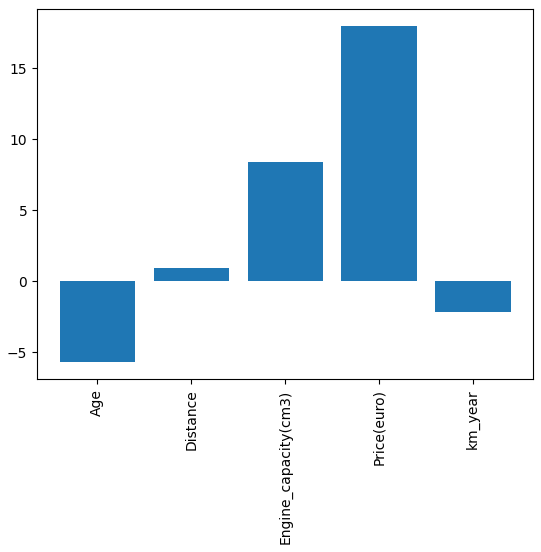

### 1.3.5. Вывод

В целом, метод главных компоннент позволяет проводить и линейную, и логистическую регрессию, однако интерпретация весов может быть несколько затруднена по сравнению с использованием обычных нормализованых данных. По крайней мере, я бы уже не стал делать очень далеко идущие выводы.

# 2. Метод главных компонент
## 2.1. Синтетические данные
*	Сгенерируйте данные, распределенные как знак Инь и Ян или концентрические круги, и проверьте, как работает алгоритм кластеризации К-Средних на этих данных.
*	Сделайте преобразование исходных данных, чтобы улучшить результаты кластеризации.
*	Оцените оптимальное число кластеров по методу Локтя для всех ситуаций.


### 2.1.1. Генерация данных
Сгенерируем Инь-ян с низким значением шумов:

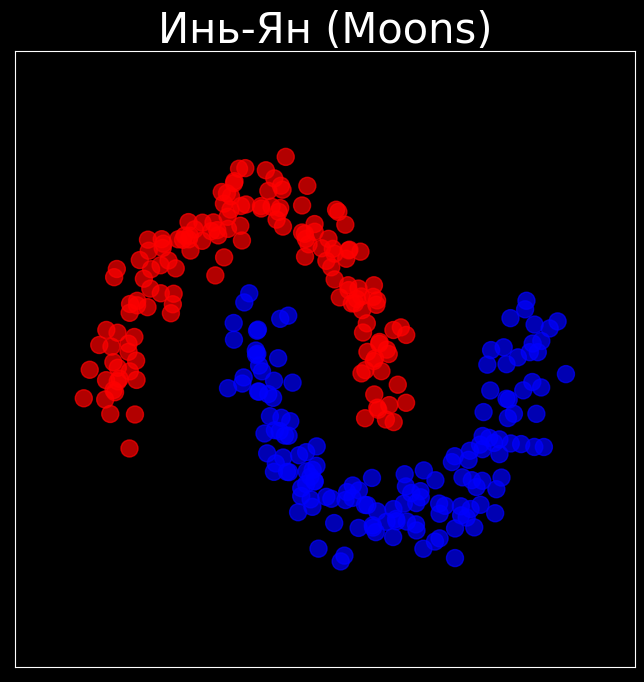

In [55]:
moons = make_binary_clf(method = 'moons', noises=0.1, N=300)

fig=plt.figure(figsize=(8,8))
ax = plt.subplot()
plot_data(ax, moons,
          'Инь-Ян (Moons)')

### 2.1.2. Метод локтя
Используя метод локтя, обнаружим, что два компонента являются наиболее оптимальным значением:

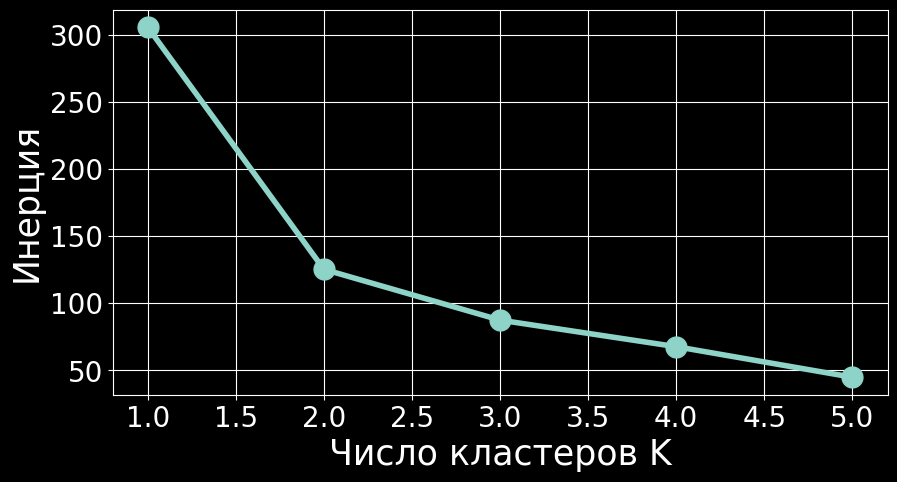

In [56]:
X, y = moons

sse = []
list_k = list(range(1, 6))
for k in list_k:
    km = KMeans_synth(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia)

plt.figure(figsize=(10, 5))
plt.plot(list_k, sse, '-o',
         linewidth = 4, markersize = 15)
plt.xlabel('Число кластеров K', fontsize = 25)
plt.ylabel('Инерция', fontsize = 25)

plt.grid();
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20);

### 2.1.3. Разбиение на кластеры
Теперь разобьем наш набор на кластеры:

Мы остановились на итерации: 5


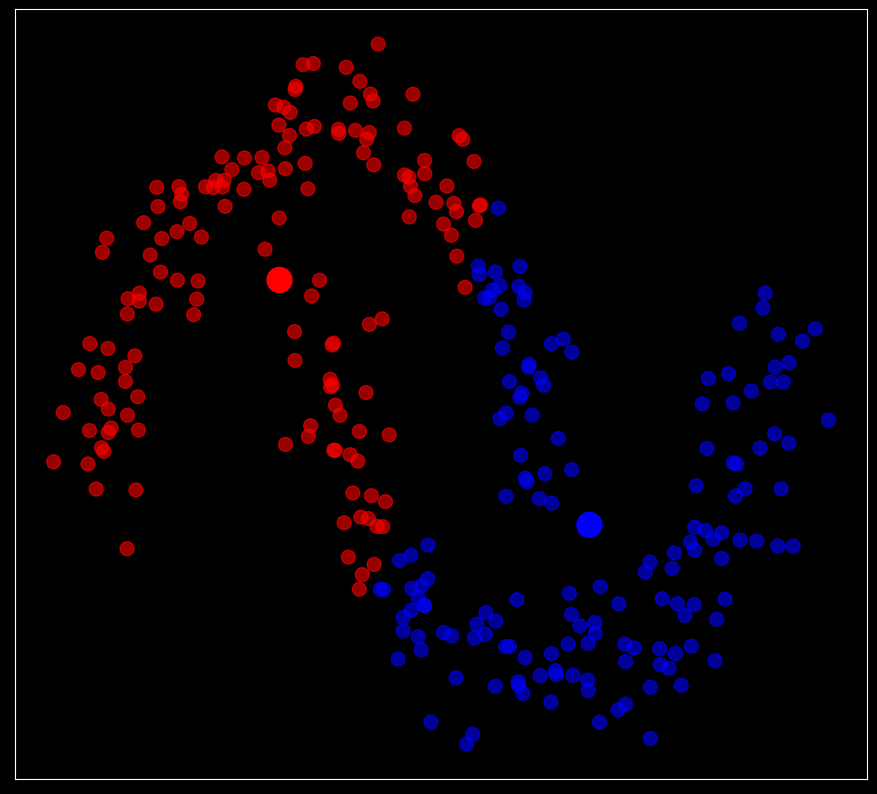

In [57]:
kmeans   = KMeans_synth(n_clusters=2,max_iter=100, tol=0.01, random_state= 42)
c_labels = kmeans.fit_transform(X)

print('Мы остановились на итерации:',kmeans.iters)


plot_cluster(X,kmeans.centroids, 
             c_labels, np.unique(c_labels),)

В целом неплохо, но хотелось бы более красивого разделения. Для этого воспользуемся полиномиальным преобразованием. Но сделаем его чуть позднее, а пока что ради интереса разобьем на три кластера:

Мы остановились на итерации: 26


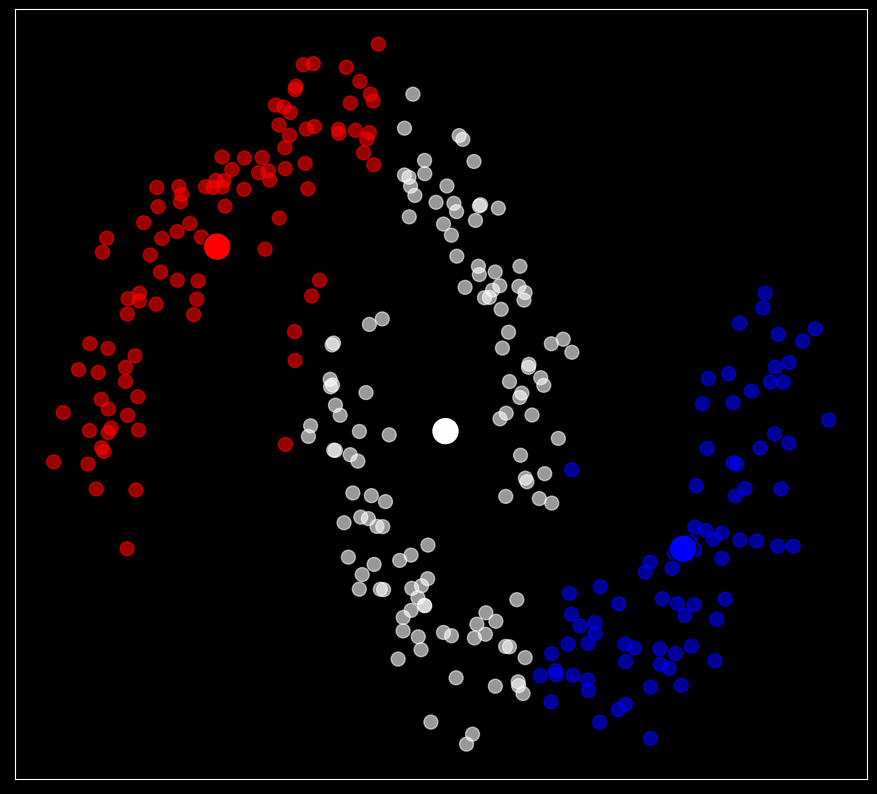

In [58]:
kmeans   = KMeans_synth(n_clusters=3,max_iter=100, tol=0.01, random_state= 42)
c_labels = kmeans.fit_transform(X)

print('Мы остановились на итерации:',kmeans.iters)


plot_cluster(X,kmeans.centroids, 
             c_labels, np.unique(c_labels),)

Получилось довольно забавно :)

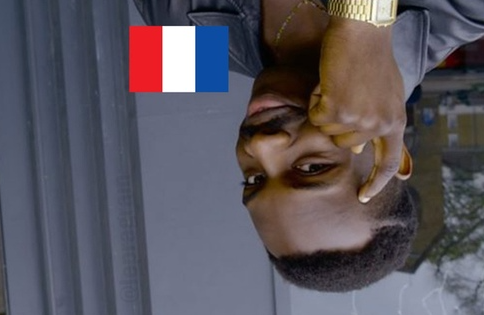

### 2.1.4. Полиномиальное преобразование
Попробуем привести исходные данные к полиному 5 степени:

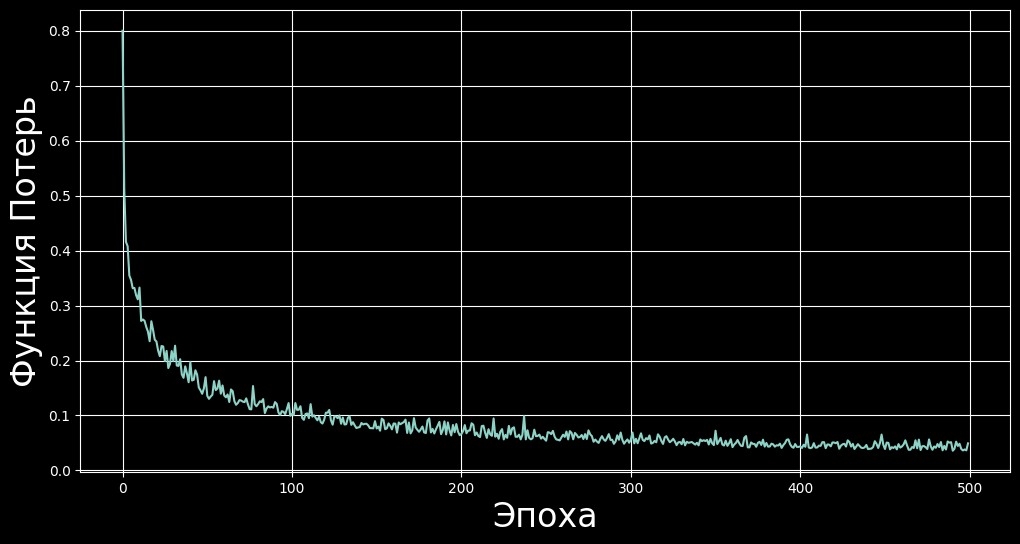

1.0 1.0
True Positives:1.0000	True Negatives:1.0000
False Positives:0.0000	False Negatives:0.0000
Accuracy:1.0000
Recall:1.0000	Precision:1.0000
f1 measure:1.0000


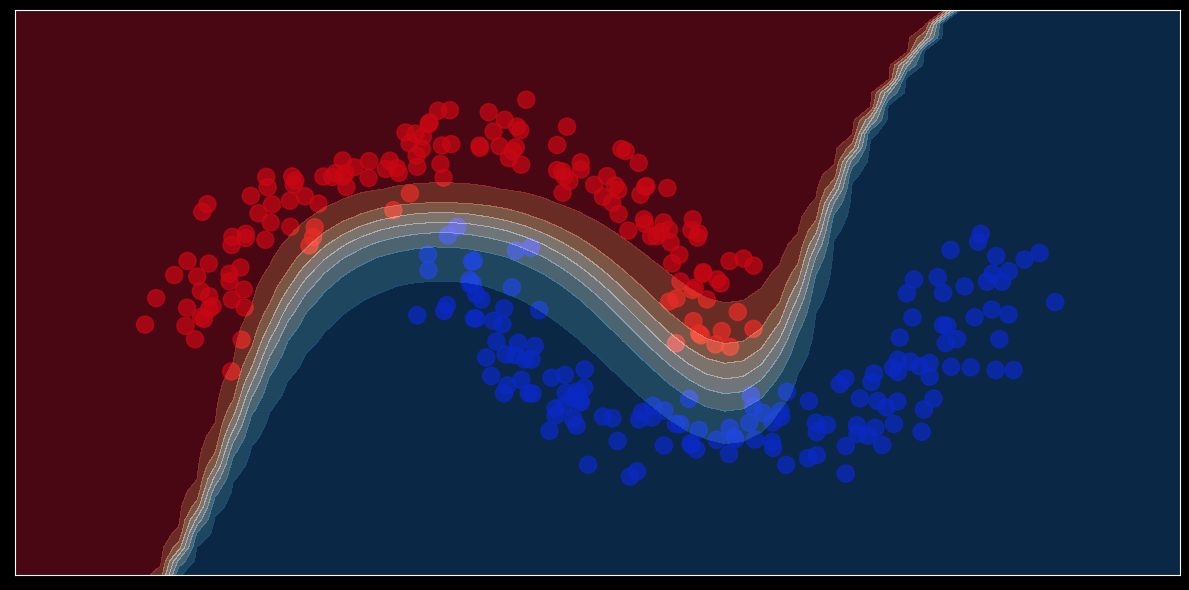

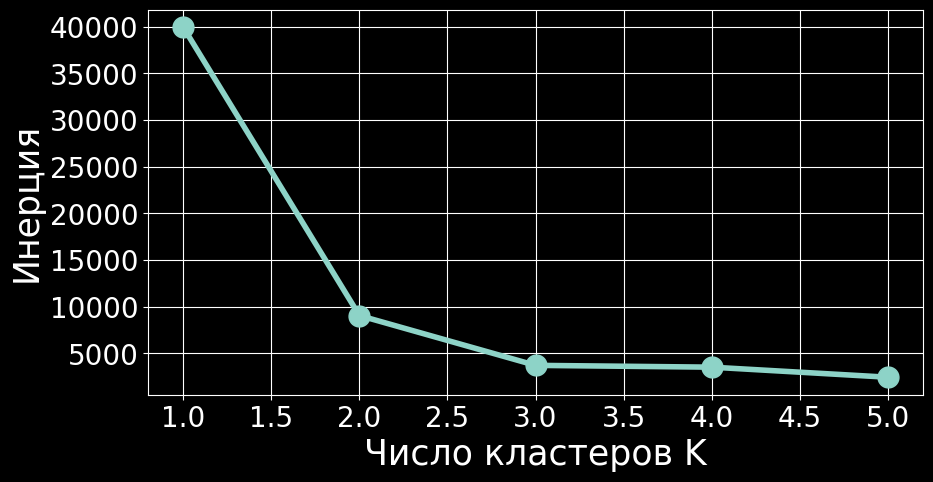

In [59]:
X,y = moons
order = 5
X_poly = to_polynom(X, order = order)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

regr = LogisticRegression(learning_rate=0.25,
                          epochs=500,batch_size=50,
                          )
regr.fit(X_train, y_train)

regr.plot_cost()
print(regr.score(X_test, y_test), regr.score(X_train, y_train))
regr.classification_report(X_test, y_test)
regr.plot_desicion_function(X_poly,y,
                            poly = True, order = order)

sse = []
list_k = list(range(1, 6))
for k in list_k:
    km = KMeans_synth(n_clusters=k)
    km.fit(X_poly)
    sse.append(km.inertia)

plt.figure(figsize=(10, 5))
plt.plot(list_k, sse, '-o',
         linewidth = 4, markersize = 15)
plt.xlabel('Число кластеров K', fontsize = 25)
plt.ylabel('Инерция', fontsize = 25)

plt.grid();
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20);

В результате получаем прекраснейшее разделение в рамках логистической регрессии. Метрики идеальные, ошибок нет.
Попробуем проверить кластеризацию (возьмем 2 компоненты, исходя из метода локтя):

Мы остановились на итерации: 7


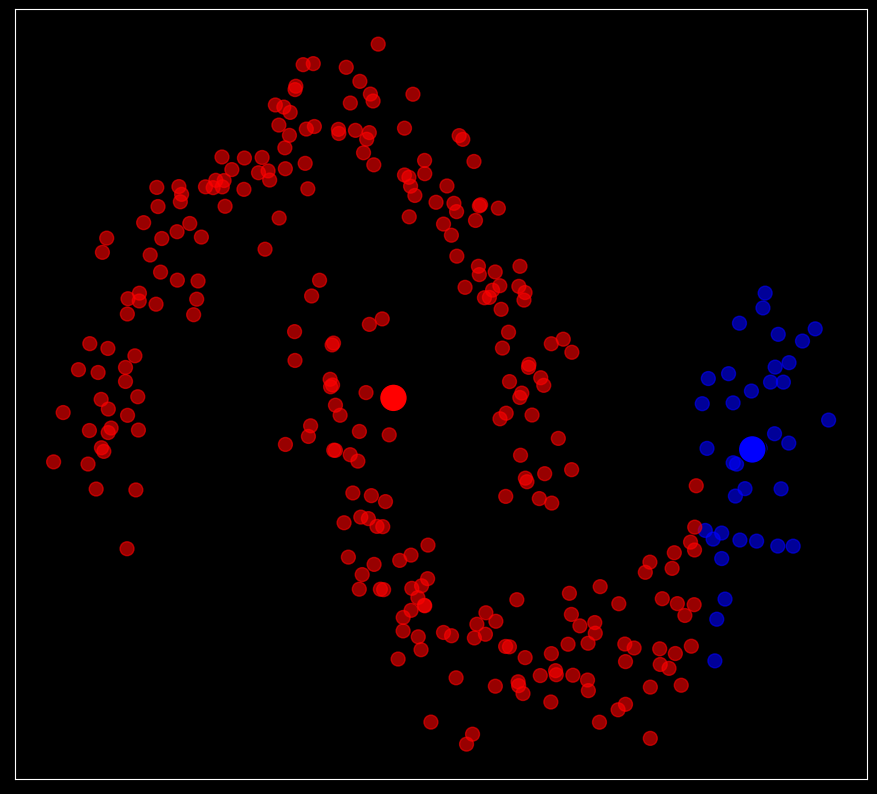

In [60]:
kmeans   = KMeans_synth(n_clusters=2,max_iter=1000, tol=0.001, random_state= 42)
c_labels = kmeans.fit_transform(X_poly)

print('Мы остановились на итерации:',kmeans.iters)


plot_cluster(X_poly,kmeans.centroids, 
             c_labels, np.unique(c_labels))

Кластеризация приуныла: красный кластер аннексировал больше половины территории синего, непорядок.
Вероятно, нужно создавать новые более сложные признаки, но это уже совсем другая история...

### 2.1.4. Концентрические окружности
Попробуем поработать с концентрическими окружностями. Видим, что степенное преобразование исходных данных ко второй степени улучшает только логистическую регрессию, не меняя кластеризацию:

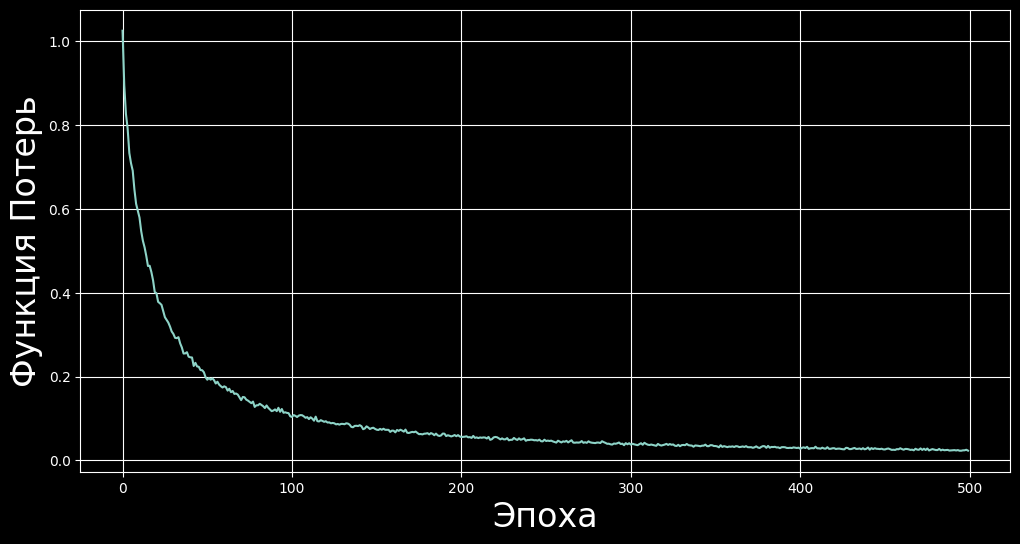

1.0 1.0
True Positives:1.0000	True Negatives:1.0000
False Positives:0.0000	False Negatives:0.0000
Accuracy:1.0000
Recall:1.0000	Precision:1.0000
f1 measure:1.0000
Мы остановились на итерации: 5


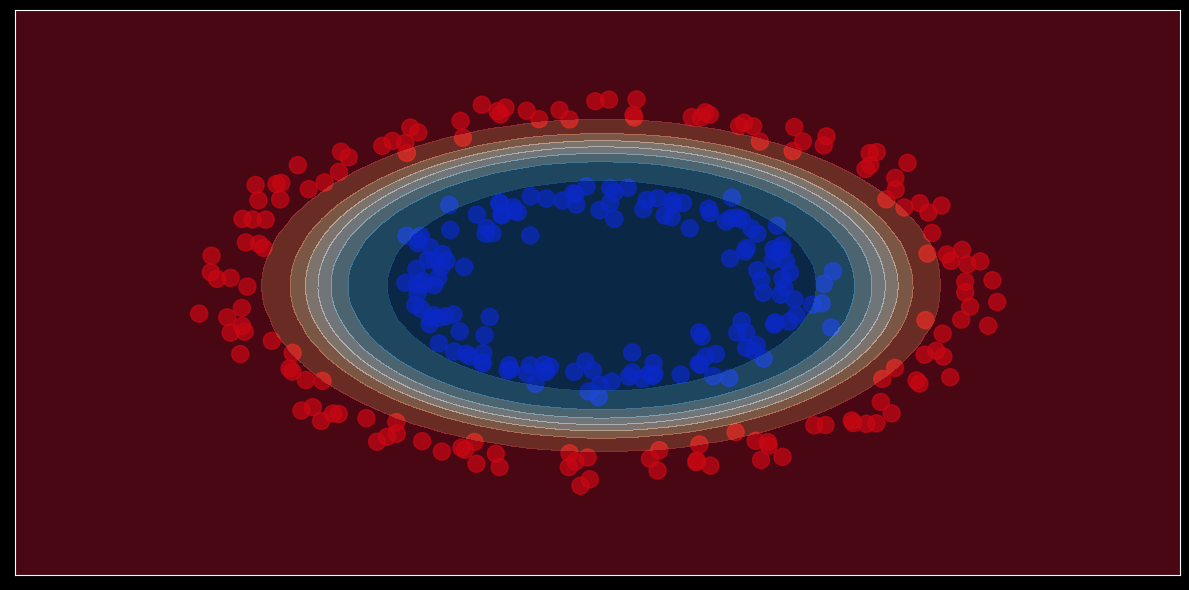

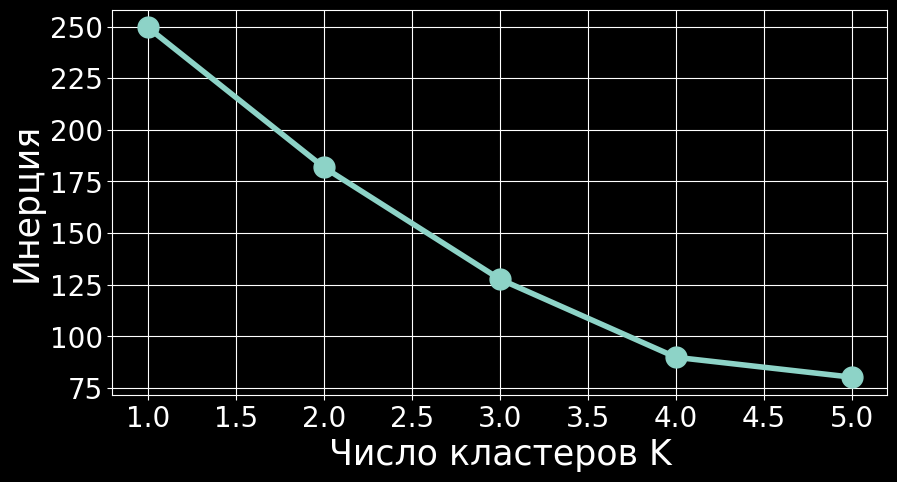

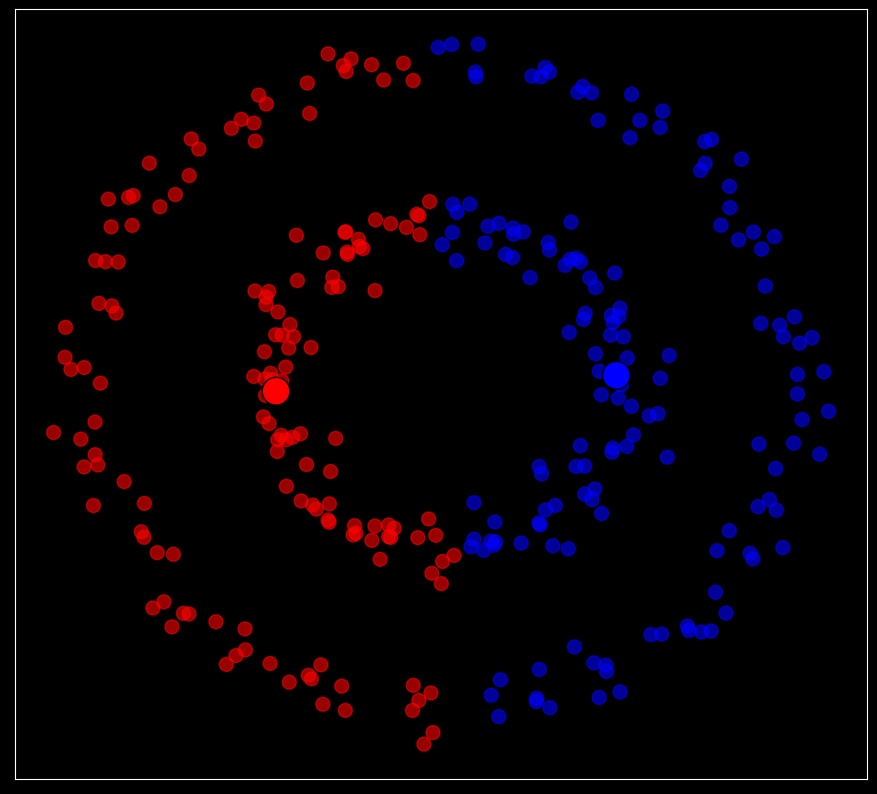

In [61]:
circles = make_binary_clf(method = 'circles', noises=0.05, N=300)

X,y = circles
order = 2
X_poly = to_polynom(X, order = order)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

regr = LogisticRegression(learning_rate=0.25,
                          epochs=500,batch_size=50,
                          )
regr.fit(X_train, y_train)

regr.plot_cost()
print(regr.score(X_test, y_test), regr.score(X_train, y_train))
regr.classification_report(X_test, y_test)
regr.plot_desicion_function(X_poly,y,
                            poly = True, order = order)

sse = []
list_k = list(range(1, 6))
for k in list_k:
    km = KMeans_synth(n_clusters=k)
    km.fit(X_poly)
    sse.append(km.inertia)

plt.figure(figsize=(10, 5))
plt.plot(list_k, sse, '-o',
         linewidth = 4, markersize = 15)
plt.xlabel('Число кластеров K', fontsize = 25)
plt.ylabel('Инерция', fontsize = 25)

plt.grid();
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20);

kmeans   = KMeans_synth(n_clusters=2,max_iter=1000, tol=0.001, random_state= 42)
c_labels = kmeans.fit_transform(X_poly)

print('Мы остановились на итерации:',kmeans.iters)


plot_cluster(X_poly,kmeans.centroids, 
             c_labels, np.unique(c_labels))

Попробуем ввести новый признак - сумму квадратов исходных данных:

In [62]:
X,y = circles
sqrts = []
for i in range(0, len(X)):
    s = X[i]**2 + y[i]**2
    sqrts.append(s)
X_s = np.array(sqrts)

Теперь проведем преобразование К-средних от данного признака и выведем результаты кластеризации: 

Мы остановились на итерации: 8


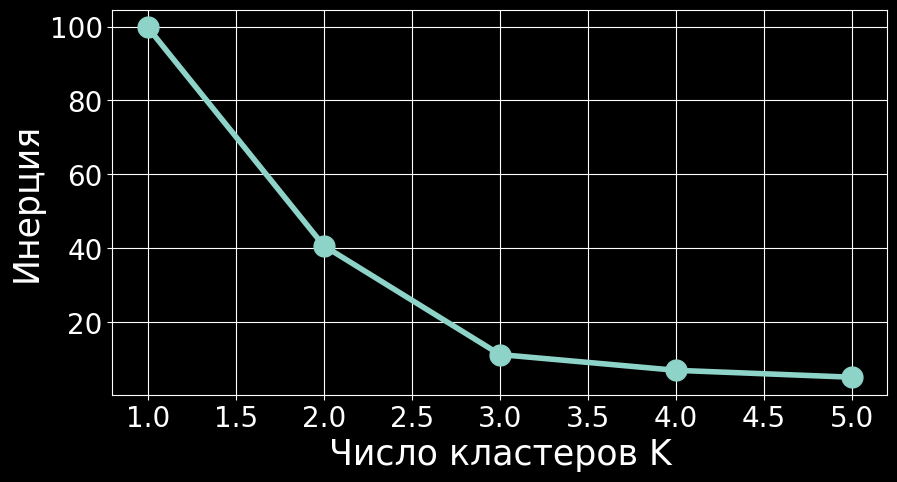

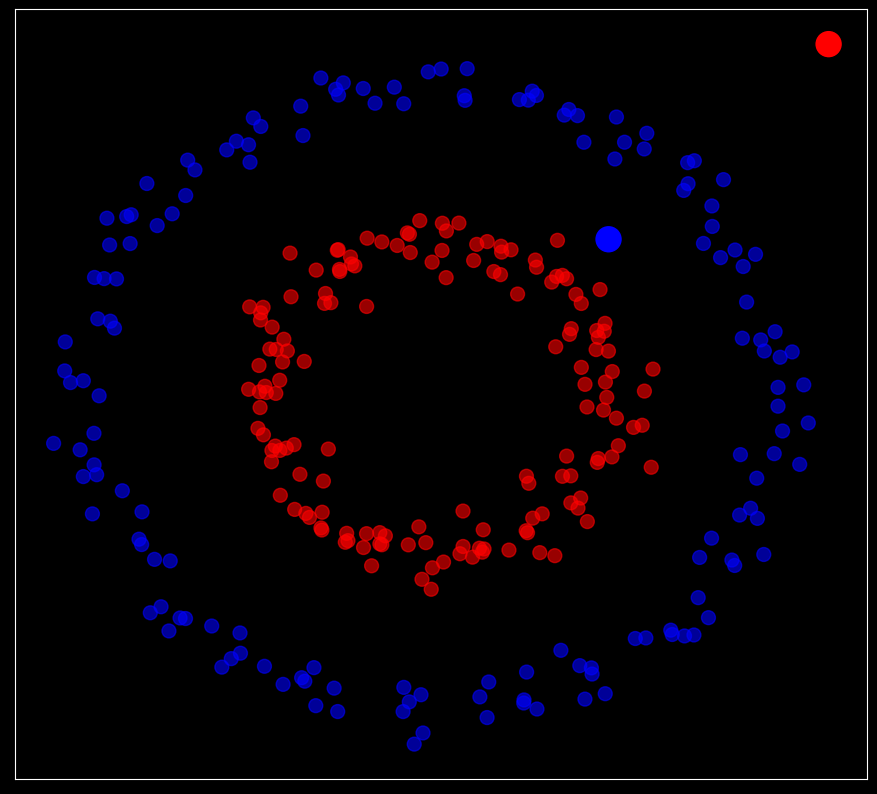

In [63]:
sse = []
list_k = list(range(1, 6))
for k in list_k:
    km = KMeans_synth(n_clusters=k)
    km.fit(X_s)
    sse.append(km.inertia)

plt.figure(figsize=(10, 5))
plt.plot(list_k, sse, '-o',
         linewidth = 4, markersize = 15)
plt.xlabel('Число кластеров K', fontsize = 25)
plt.ylabel('Инерция', fontsize = 25)

plt.grid();
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20);

kmeans   = KMeans_synth(n_clusters=2,max_iter=1000, tol=0.001, random_state= 42)
c_labels = kmeans.fit_transform(X_s)

print('Мы остановились на итерации:',kmeans.iters)


plot_cluster(X,kmeans.centroids, 
             c_labels, np.unique(c_labels))

**Ура, получилось!** Кластеры оформились замечательно, но центроиды теперь выглядят несколько необычно :)

### 2.1.5. Вернемся к Инь-яну

Теперь попробуем сделать то же самое для Инь-яна. Для этого в новом признаке перед **X^2** методом тыка добавим коэффициент **a** и попробуем методом тыка подобрать его так, чтобы данные кластеризовались как нужно "по лунам". После нескольких попыток была обнаружена следующая закономерность: чем ближе **а** к 0, тем лучше результаты разбиения и адекватнее расположение центроидов. В качестве примера рассмотрим коэффициент **a = 1/100**, позволяющий кластеризовать даже не самые очевидные "луны":

Мы остановились на итерации: 2


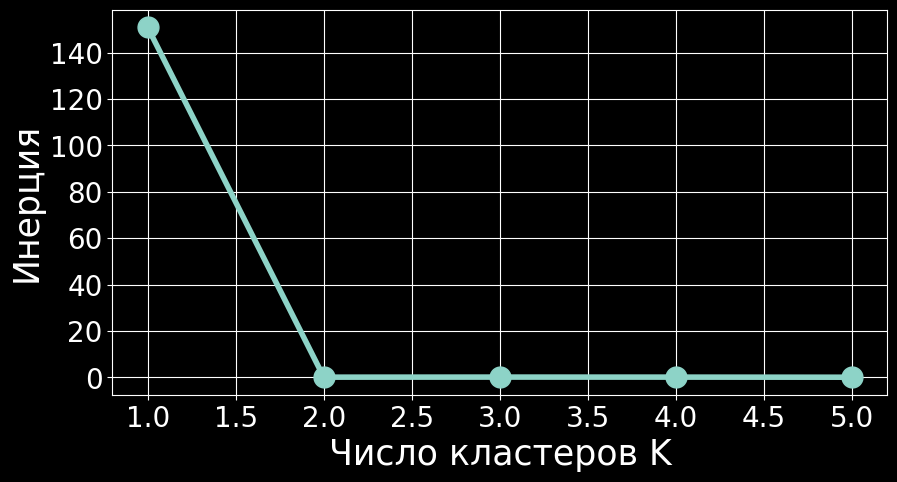

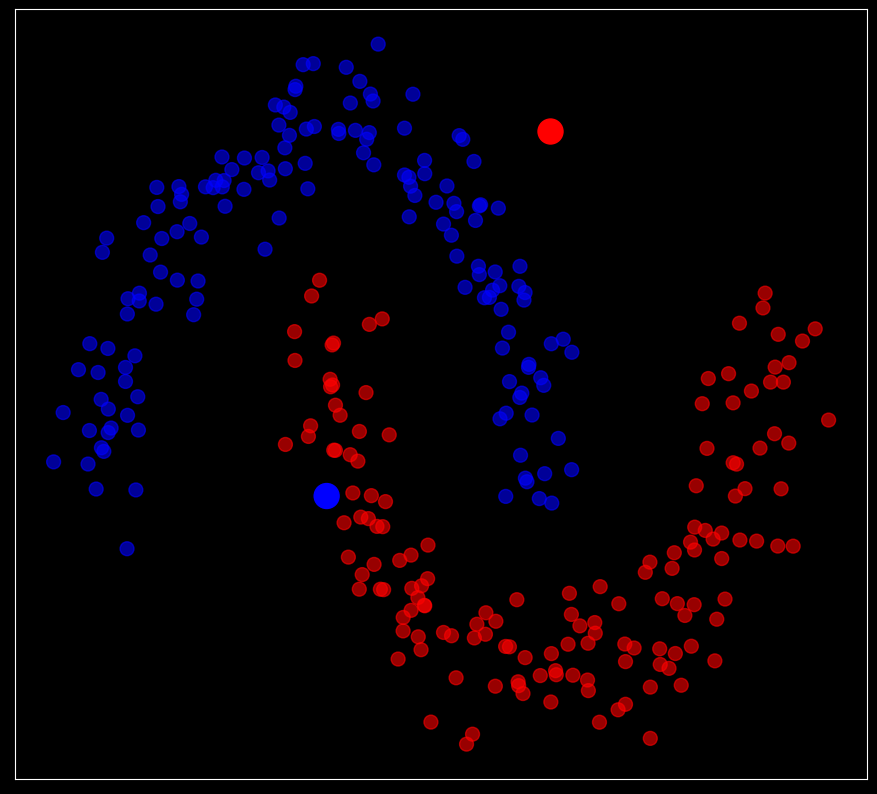

In [64]:
a = 1/100

X,y = moons
sqrts = []
for i in range(0, len(X)):
    s = a*X[i]**2 + y[i]**2
    sqrts.append(s)
X_s = np.array(sqrts)

sse = []
list_k = list(range(1, 6))
for k in list_k:
    km = KMeans_synth(n_clusters=k)
    km.fit(X_s)
    sse.append(km.inertia)

plt.figure(figsize=(10, 5))
plt.plot(list_k, sse, '-o',
         linewidth = 4, markersize = 15)
plt.xlabel('Число кластеров K', fontsize = 25)
plt.ylabel('Инерция', fontsize = 25)

plt.grid();
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20);

kmeans   = KMeans_synth(n_clusters=2,max_iter=1000, tol=0.001, random_state= 42)
c_labels = kmeans.fit_transform(X_s)

print('Мы остановились на итерации:',kmeans.iters)


plot_cluster(X,kmeans.centroids, 
             c_labels, np.unique(c_labels))

Бинго! :) Получилось! Здесь, кстати, метод локтя очень хорошо себя показывает.

Попробуем на более шумных и объемных данных:

Мы остановились на итерации: 1


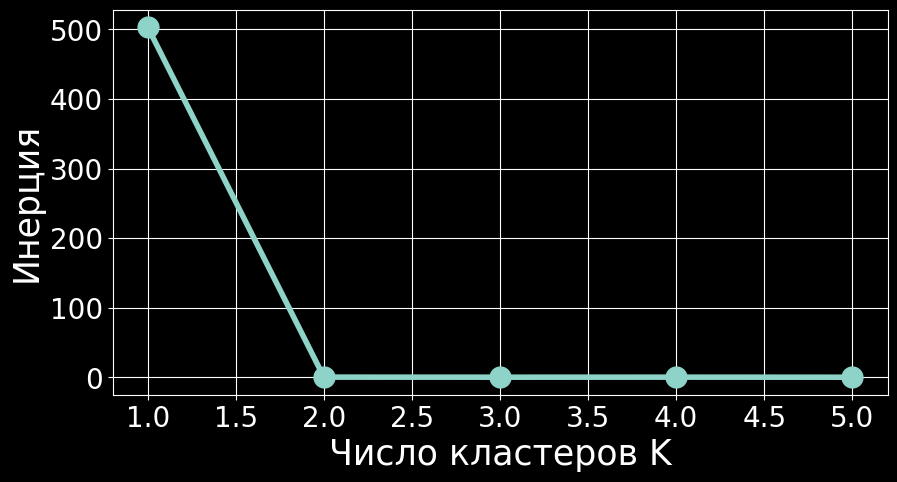

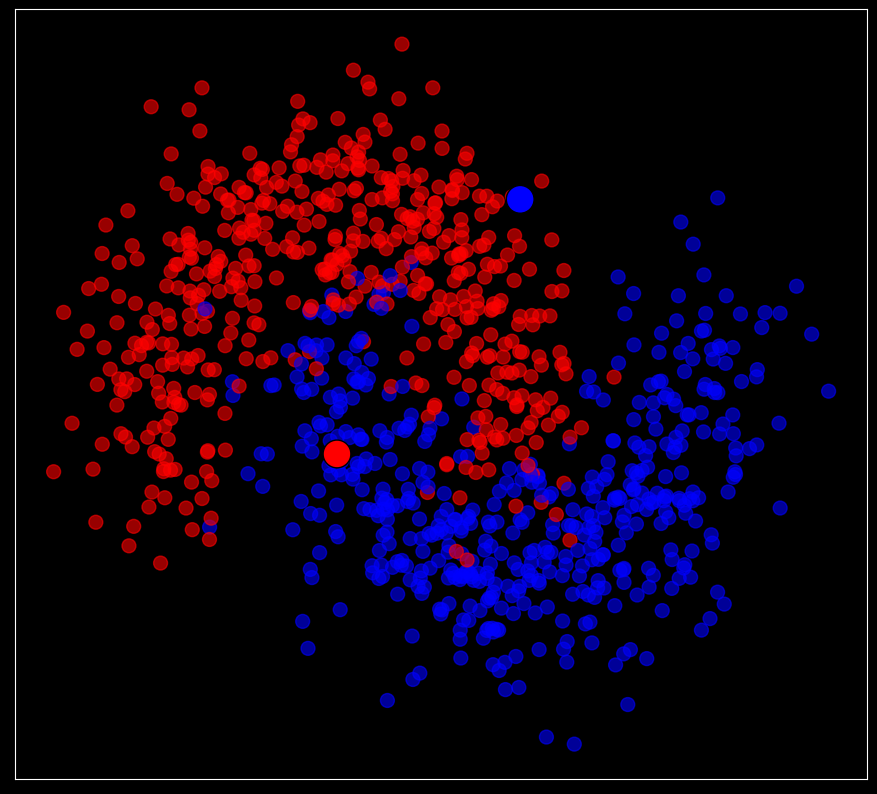

In [65]:
moons = make_binary_clf(method = 'moons', noises=0.25, N=1000)

a = 1/100

X,y = moons
sqrts = []
for i in range(0, len(X)):
    s = a*X[i]**2 + y[i]**2
    sqrts.append(s)
X_s = np.array(sqrts)

sse = []
list_k = list(range(1, 6))
for k in list_k:
    km = KMeans_synth(n_clusters=k)
    km.fit(X_s)
    sse.append(km.inertia)

plt.figure(figsize=(10, 5))
plt.plot(list_k, sse, '-o',
         linewidth = 4, markersize = 15)
plt.xlabel('Число кластеров K', fontsize = 25)
plt.ylabel('Инерция', fontsize = 25)

plt.grid();
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20);

kmeans   = KMeans_synth(n_clusters=2,max_iter=1000, tol=0.001, random_state= 42)
c_labels = kmeans.fit_transform(X_s)

print('Мы остановились на итерации:',kmeans.iters)


plot_cluster(X,kmeans.centroids, 
             c_labels, np.unique(c_labels))

Тоже отлично работает.

### 2.1.6. Вывод
**"Feature Engineering и труд всё перетрут)"** (c) Долганов Антон Юрьевич.

## 2.2. Набор данных MNIST

*	Загрузите данные MNIST. Используйте результаты Метода главных компонент в качестве входных данных (возьмите первые 4 главные компоненты).
*	Примените кластеризацию К-Средних на этих данных.
*	Визуализируйте результат.
*	Оцените связь кластеров с цифрами на изображениях при использовании К = 10 (вам поможет pd.crosstab).


### 2.2.1. Загружаем данные

Загрузим датасет:

In [66]:
X, y  = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame = True, parser='auto')
X = X / 255.
X_ = X.values

X

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0          0.0  ...       0.0       0.0       0.0       0.0       0.0   
1          0.0  ...       0.0       0.0       0.0       0.0       0.0   
2          0.0  ...       0.0       0.0       0.0       0.0       0.0   
3          0.0  ...       0.0       0.0       0.0       0.0       0.0   
4          0.0  ...       0.0       0.0       0.0       0.0       0.0   
...        ...  ...       ...       ...       ...       ...       ...   
69995      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69996      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69997      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69998      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69999      0.0  ...       0.0       0.0       0.0       0.0       0.0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
0           0.0       0.0       0.0       0.0       0.0  
1           0.0       0.0       0.0       0.0       0.0  
2           0.0       0.0       0.0       0.0       0.0  
3           0.0       0.0       0.0       0.0       0.0  
4           0.0       0.0       0.0       0.0       0.0  
...         ...       ...       ...       ...       ...  
69995       0.0       0.0       0.0       0.0       0.0  
69996       0.0       0.0       0.0       0.0       0.0  
69997       0.0       0.0       0.0       0.0       0.0  
69998       0.0       0.0       0.0       0.0       0.0  
69999       0.0       0.0       0.0       0.0       0.0  

[70000 rows x 784 columns]

### 2.2.2. Воспользуемся методом главных компонент 
Возьмем только 4 первых компоненты:

0.4940454136969361


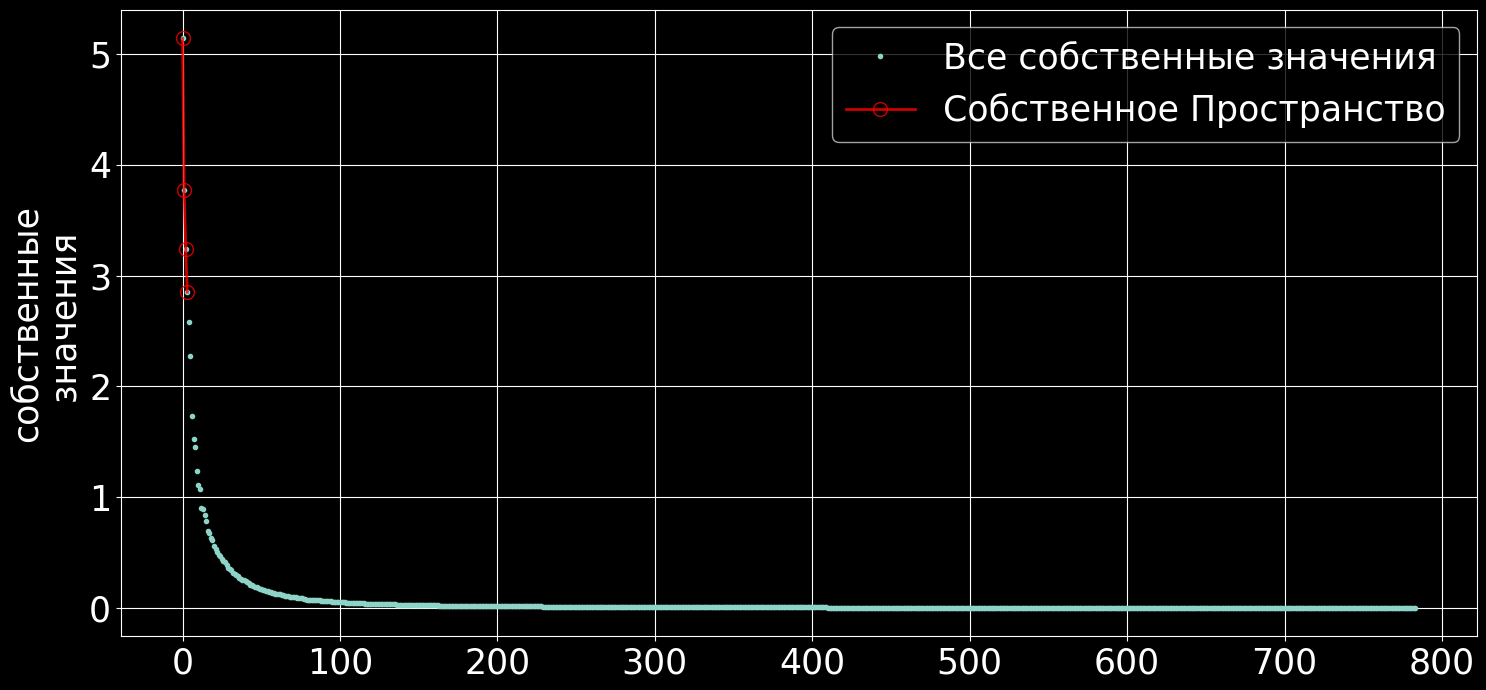

In [67]:
pca = PCA_synth(n_components = 4)
pca.fit(X_)
print(pca.score(X_))

pca.plot_eigvalues();

In [68]:
pca_result_mnist = pca.transform(X_)
pca_inverse = pca.inverse_transform(pca_result_mnist)

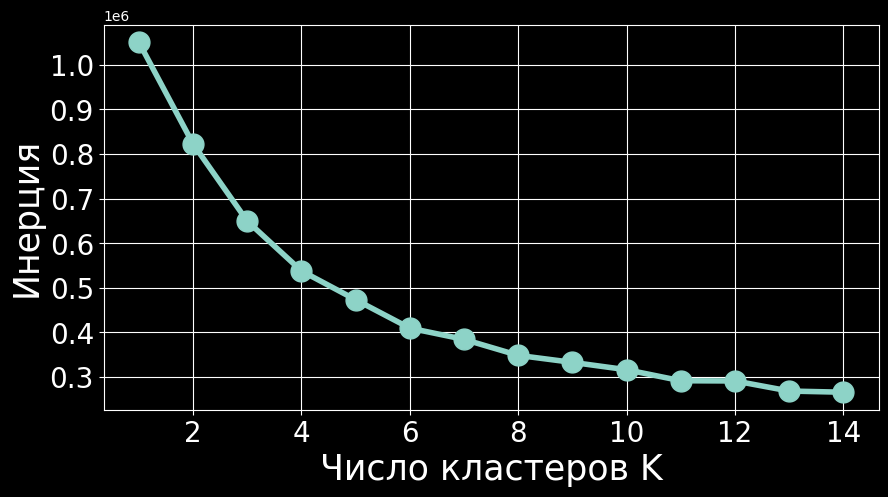

In [69]:
X_new = pca_result_mnist

sse = []
list_k = list(range(1, 15))
for k in list_k:
    km = KMeans_synth(n_clusters=k)
    km.fit(X_new)
    sse.append(km.inertia)

plt.figure(figsize=(10, 5))
plt.plot(list_k, sse, '-o',
         linewidth = 4, markersize = 15)
plt.xlabel('Число кластеров K', fontsize = 25)
plt.ylabel('Инерция', fontsize = 25)

plt.grid();
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20);

### 2.2.3. К-средних
Возьмем 10 кластеров и подадим на вход данные метода главных компонент:

Мы остановились на итерации: 14


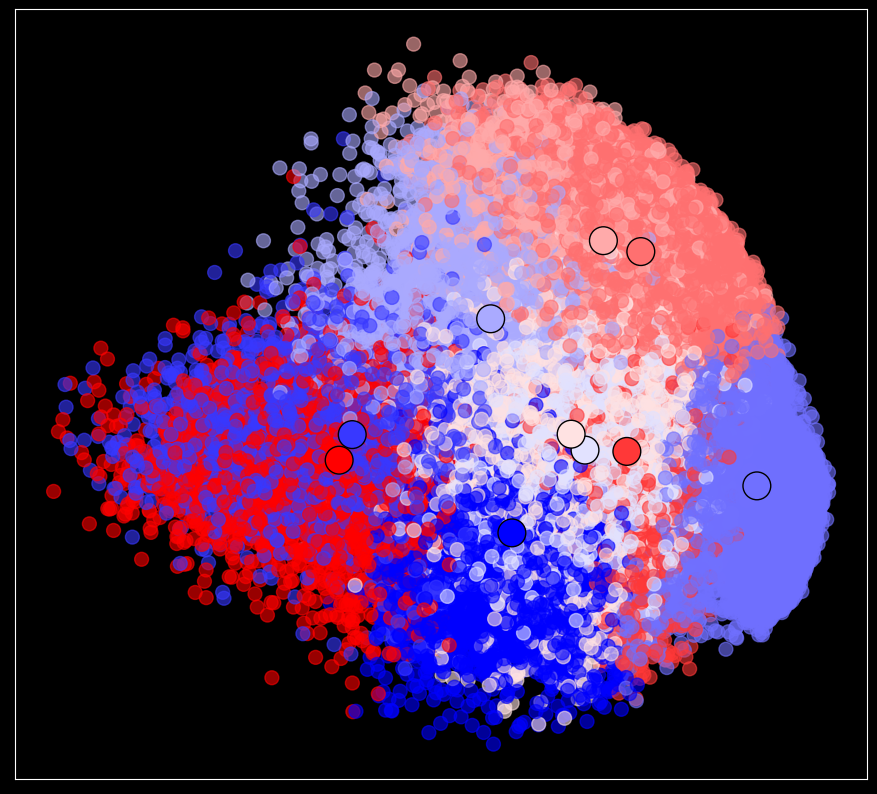

In [70]:
kmeans   = KMeans_synth(n_clusters=10,max_iter=100, tol=0.01, random_state= 42)
c_labels = kmeans.fit_transform(X_new)

print('Мы остановились на итерации:',kmeans.iters)

plot_cluster(X_new,kmeans.centroids, 
             c_labels, np.unique(c_labels),)

Сравним с исходным пространством главных компонент и в целом увидим похожую картину:

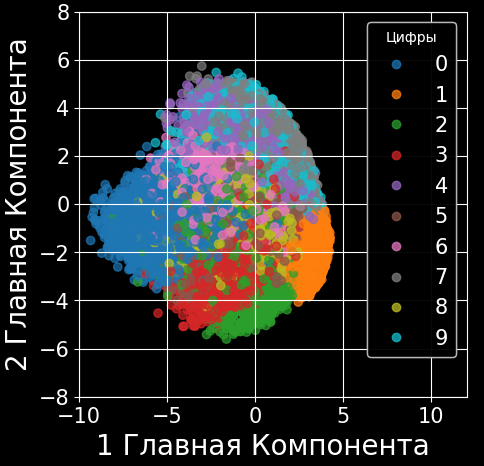

### 2.2.4. Оценим связь кластеров с цифрами
Для этого построим кросс-таблицу, а также визуализируем её с помощью тепловой карты с нормализацией значений по кластерам:

In [71]:
cross = pd.crosstab(y,c_labels, rownames=['Метки'], colnames = ['Предсказания'])
cross

Предсказания     0     1     2     3     4     5     6     7     8     9
Метки                                                                   
0              224  2564     9   277   433   249    15    10   164  2958
1                4     0  7631     1    28    30     1     7   175     0
2              405   370   738   318   125  3965    83    26   792   168
3             3219    84   235     9  1117   143    92    62  2047   133
4                0    22   374  1183    20   412  2461  2260    92     0
5             1502    67   567    36  2007   351   294   447   737   305
6               19   209   565  2630   161  3045    13     6   129    99
7                0     5   648    53    91    78  2397  3892   123     6
8              707   142   572    51  2717   211   232   309  1597   287
9               35    30   310   415   156    15  2644  3137   186    30

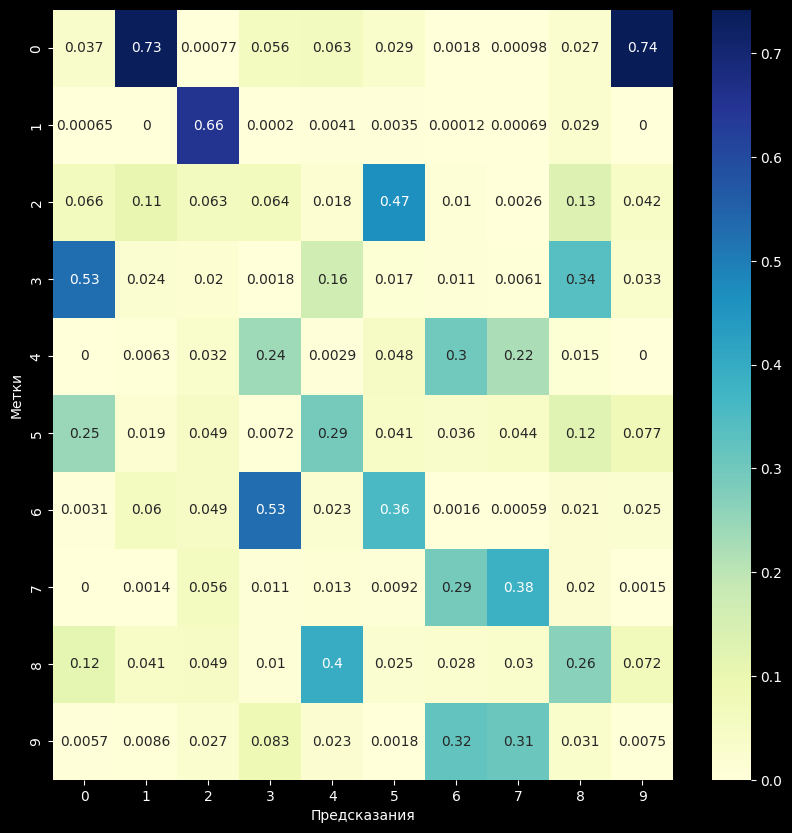

In [72]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.crosstab(y, c_labels,rownames=['Метки'], colnames = ['Предсказания'], normalize='columns'),
            cmap="YlGnBu",
            annot=True,
            cbar=True);

Исходя из кросстаблицы можно сделать вывод, что в 0 кластер в основном попали тройки и немножко пятерки, в 1 и 9 кластеры - в основном нули, во 2 - единицы. Многие кластеры включают в себя сразу несколько цифр.

### 2.2.5. Вывод
Даже с помощью небольшого числа главных компонент удалось относительно неплохо кластеризовать наши данные методом К-средних.

## 2.3. Набор данных Cars Moldova

*	Загрузите набор данных Cars (сразу очищенный от дубликатов и выбросов, лучше с добавленными признаками из «Задания 1»).
*	Выполните кластеризацию для числовых признаков после предварительной обработки. Используйте все числовые признаки, выполнив визуализацию в разных двумерных проекциях (как в примере для набора данных MNIST).
*	Оцените связь кластеров с категориальными признаками (вам поможет pd.crosstab).



### 2.3.1. Загружаем датасет

Сразу же удалим столбец Years:

In [73]:
df = pd.read_csv('content/cars_moldova_cat_num.csv', delimiter = ',')
df = df.drop('Year', axis=1)
df

Make  Model  Style  Distance  Engine_capacity(cm3)  Fuel_type  \
0        40     92      4  195000.0                1800.0          2   
1        32     62     11  135000.0                1500.0          0   
2        32     71     11  110000.0                1500.0          0   
3        28     23     11  200000.0                1600.0          3   
4        23    124      5  300000.0                2200.0          0   
...     ...    ...    ...       ...                   ...        ...   
32069    42     88     10   88000.0                1800.0          4   
32070    19     53      3  225000.0                1800.0          3   
32071     6     77     11   89000.0                1500.0          0   
32072    22     10      1  370000.0                2000.0          0   
32073    32     62      6  300000.0                1500.0          0   

       Transmission  Price(euro)  Age       km_year  
0                 1       7750.0   11  17727.272727  
1                 0       8550.0    8  16875.000000  
2                 0       6550.0   10  11000.000000  
3                 0       4100.0   16  12500.000000  
4                 0       3490.0   22  13636.363636  
...             ...          ...  ...           ...  
32069             1      11500.0    6  14666.666667  
32070             0       4400.0   20  11250.000000  
32071             0       7000.0    7  12714.285714  
32072             0       4000.0   16  23125.000000  
32073             0       4000.0   16  18750.000000  

[32074 rows x 10 columns]

In [74]:
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']
num_columns = ['Age', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year'] 

Нормализуем значения:

In [75]:
df_num = df[num_columns].copy()
scaler = MinMaxScaler()
X = scaler.fit_transform(df_num)
X.shape

(32074, 5)

### 2.3.2. Кластеризация для числовых признаков

Разобьем числовые данные на четыре кластера:

Мы остановились на итерации: 25


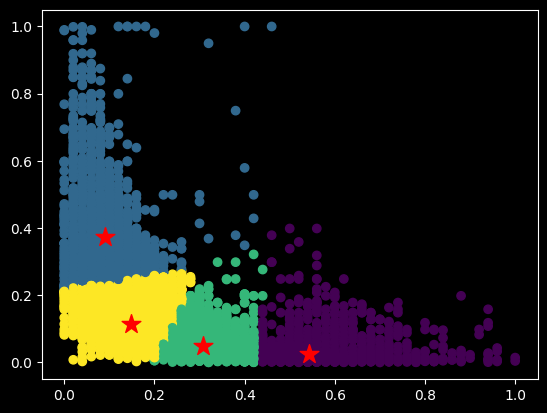

In [76]:
kmeans   = KMeans_cars(n_clusters=4, max_iter=1000, tol=0.0001)
c_labels = kmeans.fit_transform(X[:,[0,3]])

print('Мы остановились на итерации:',kmeans.iters)

plt.scatter(X[:, 0], X[:, 3], c = c_labels)

plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1],marker='*', s=200, c='red')

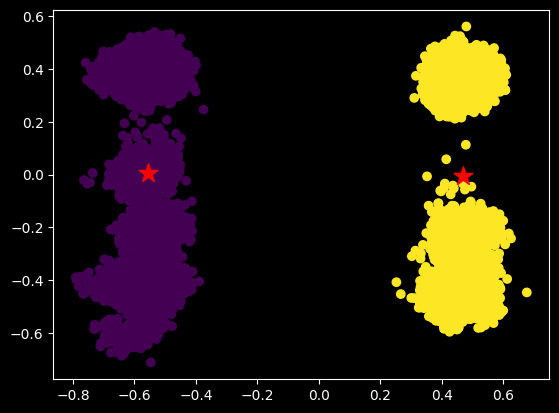

Мы остановились на итерации: 2


In [77]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df)

pca = PCA_cars(n_components = 2)
pca.fit(X)
X_new = pca.transform(X)


kmeans   = KMeans_cars(n_clusters=2, max_iter=1000, tol=0.00001)
c_labels = kmeans.fit_transform(X_new)

plt.scatter(X_new[:,0],X_new[:,1], c = c_labels);
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1],marker='*', s=200, c='red')
plt.show();
print('Мы остановились на итерации:',kmeans.iters)

### 2.3.3. Пространство главных компонент 
Построим пространство главных компонент с помощью двумерных проекций:

0.8623649434575256


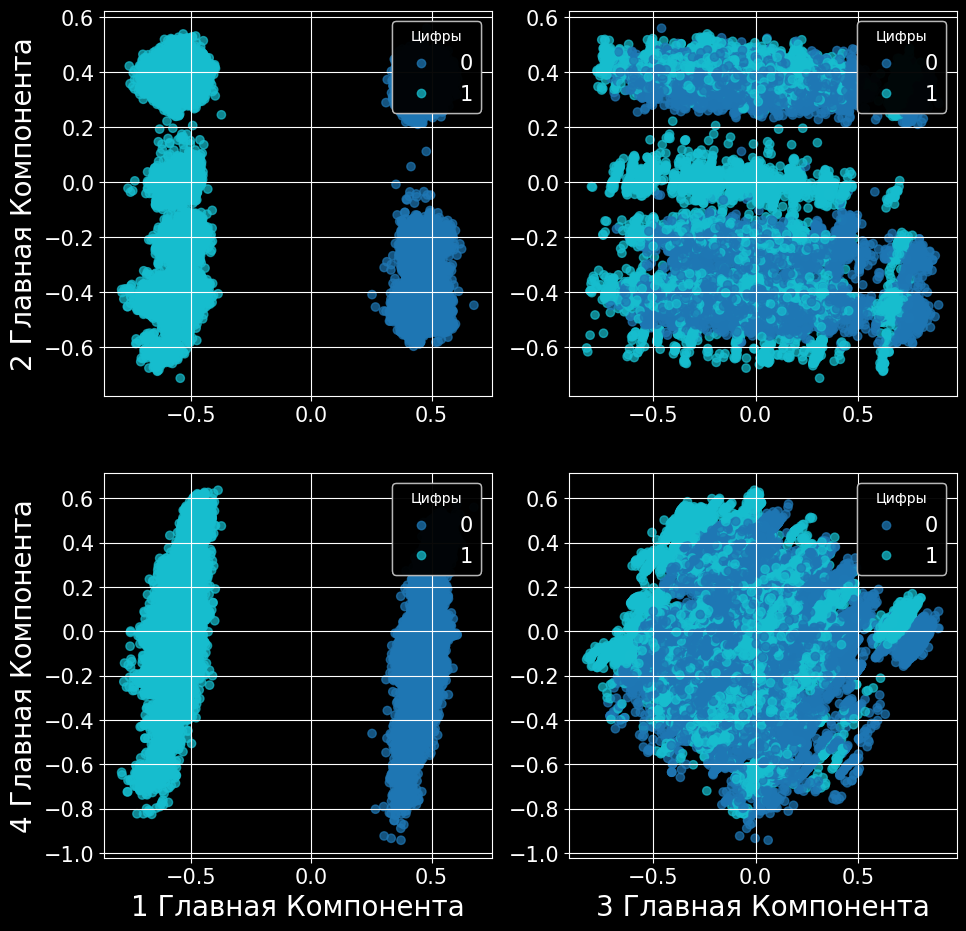

In [78]:
pca = PCA_cars(n_components = 4)
pca.fit(X)
print(pca.score(X))

y = df.Transmission.values
pca_result_mnist = pca.transform(X)
pca_inverse = pca.inverse_transform(pca_result_mnist)

pca_names = [str(x+1) + ' Главная Компонента' for x in range(4)]
plot_multi_1(pca_result_mnist, y.astype(int), pca_names);

### 2.3.4. Кросс-таблица
Построим кросс-таблицу и сравним предсказания кластеризации с реальными значениями:

In [79]:
y = range(32074)
cross = pd.crosstab(y,c_labels, rownames=['Метки'], colnames = ['Предсказания'])
cross

Предсказания  0  1
Метки             
0             1  0
1             0  1
2             0  1
3             0  1
4             0  1
...          .. ..
32069         1  0
32070         0  1
32071         0  1
32072         0  1
32073         0  1

[32074 rows x 2 columns]

In [80]:
cross.value_counts()

0  1
0  1    17395
1  0    14679
dtype: int64

In [81]:
df['Transmission'].value_counts()

0    17395
1    14679
Name: Transmission, dtype: int64

Всё совпадает, так что кластеризация прошла успешно.

### 2.3.5. Связь кластеров с категориальными признаками

Теперь рассмотрим преобразования на примере категориальных признаков:

In [82]:
df_cat = df[cat_columns].copy()
scaler = MinMaxScaler()
X = scaler.fit_transform(df_cat)
X.shape

(32074, 5)

1.0


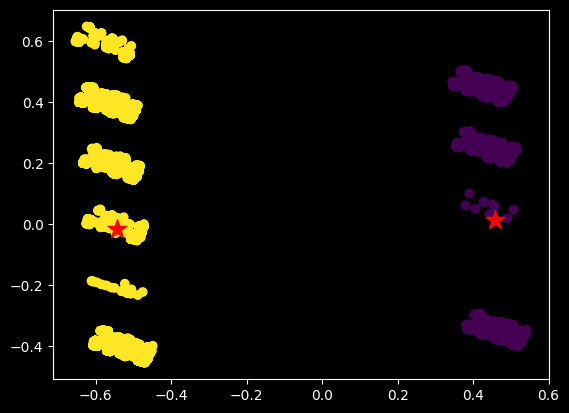

Мы остановились на итерации: 6


In [83]:
pca = PCA_cars(n_components = 10)
pca.fit(X)
X_new = pca.transform(X)
print(pca.score(X))

kmeans   = KMeans_cars(n_clusters=2, max_iter=1000, tol=0.00001)
c_labels = kmeans.fit_transform(X_new)

plt.scatter(X_new[:,0],X_new[:,1], c = c_labels);
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1],marker='*', s=200, c='red')
plt.show();
print('Мы остановились на итерации:',kmeans.iters)

Пространство главных компонент:

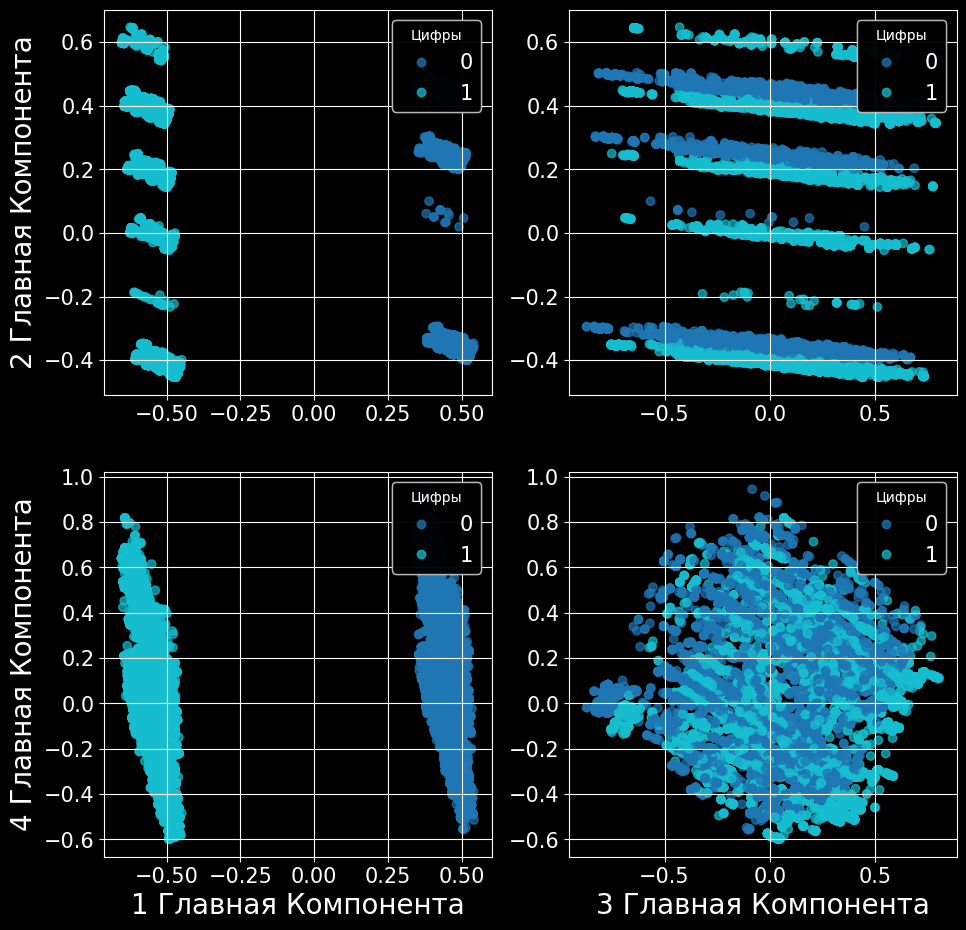

In [84]:
y = df.Transmission.values
pca_result_mnist = pca.transform(X)
pca_inverse = pca.inverse_transform(pca_result_mnist)

pca_names = [str(x+1) + ' Главная Компонента' for x in range(4)]
plot_multi_1(pca_result_mnist, y.astype(int), pca_names);

Требующуюся кросс-таблицу с категориальными признаками я построить не смог, к сожалению. Попытки делал, но не вышло.